In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("SharkAttack_clean.xlsx")

-------
# Guillermo Analysis Code

In [3]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')
df.head(5)

,Unnamed: 0,Date,Type,Region,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,0,22-Feb-2025,Unprovoked,australia and oceania,australia,Queensland,The Wrecks walking track Moreton Island,diving_activities,Unknown Male,M,29,Abdominal and leg injuries,N,Afternoon,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22-Feb-2025,Questionable,australia and oceania,australia,NSW,Off Port Stephens near Newcastle,fishing,Paul Barning,M,58,Body not recovered,Y,Afternoon,Mako shark,Simon De Marchi: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,22-Feb-2025,Unprovoked,australia and oceania,australia,Western Australia,Blasck Wall Reach Swan River Perth,surface_sport,Georgina Smith,F,35,None kayak badly damaged by shark,N,Morning,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10-Feb-2025,Unprovoked,caribbean,bahamas,NaN,Bimini Bay,swimming,Rileigh Decker,F,20,Severed archilles tendon artery severed nerves...,N,Evening,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10-Feb-2025,Unprovoked,caribbean,bahamas,NaN,Bimini Bay,swimming,Summer Layman,F,24,Left foot injured,N,Evening,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert the 'Date' column to datetime format (if not already done)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the year from the 'Date' column and create a new 'Year' column
df['Year'] = df['Date'].dt.year

In [5]:
# Create a new DataFrame called df_gfm
df_gfm = df.copy()

In [6]:
df_gfm['Fatal Y/N'].value_counts()

Fatal Y/N
N    4552
Y    1253
U     562
Name: count, dtype: int64

In [7]:
# Region Cross-Tabulation with Fatality Rate (no filter)

# Create the cross-tabulation
cross_tab_region = pd.crosstab(df_gfm['Region'], df_gfm['Fatal Y/N'], margins=True, margins_name='Total')

# Calculate the fatality rate and round to 2 decimal places
cross_tab_region['Fatality Rate (%)'] = (cross_tab_region['Y'] / (cross_tab_region['Y'] + cross_tab_region['N'])) * 100
cross_tab_region['Fatality Rate (%)'] = cross_tab_region['Fatality Rate (%)'].round(2)

# Sort by 'Y' (fatal) in descending order
cross_tab_region_sorted = cross_tab_region.sort_values('Y', ascending=False)

# Display the sorted cross-tabulation with fatality rate
display(cross_tab_region_sorted)

Fatal Y/N,N,U,Y,Total,Fatality Rate (%)
Region,,,,,
Total,4552,562,1253,6367,21.58
australia and oceania,1304,159,430,1893,24.80
north america,2122,200,227,2549,9.66
southern africa,469,69,153,691,24.60
unknown,115,21,96,232,45.50
caribbean,152,23,65,240,29.95
southeast asia,50,8,52,110,50.98
south america,103,14,51,168,33.12
southern europe,73,37,45,155,38.14


In [8]:
# Filtered Region Cross-Tabulation with Fatality Rate

# Convert 'Date' to datetime format
df_gfm['Date'] = pd.to_datetime(df_gfm['Date'], errors='coerce')
# Extract the year from the 'Date' column
df_gfm['Year'] = df_gfm['Date'].dt.year
# Filter data after 1900
df_filtered = df_gfm[df_gfm['Year'] > 1850]

# Create the cross-tabulation for filtered data
cross_tab_region = pd.crosstab(df_filtered['Region'], df_filtered['Fatal Y/N'], margins=True, margins_name='Total')

# Calculate the fatality rate and round to 2 decimal places
cross_tab_region['Fatality Rate (%)'] = (cross_tab_region['Y'] / (cross_tab_region['Y'] + cross_tab_region['N'])) * 100
cross_tab_region['Fatality Rate (%)'] = cross_tab_region['Fatality Rate (%)'].round(2)

# Sort by 'Y' (fatal) in descending order
cross_tab_region_sorted = cross_tab_region.sort_values('Y', ascending=False)

# Display the sorted cross-tabulation with fatality rate
display(cross_tab_region_sorted)

Fatal Y/N,N,U,Y,Total,Fatality Rate (%)
Region,,,,,
Total,4326,521,1115,5962,20.49
australia and oceania,1227,151,403,1781,24.72
north america,2066,185,196,2447,8.66
southern africa,447,64,144,655,24.37
unknown,95,19,65,179,40.62
caribbean,142,21,53,216,27.18
southeast asia,48,8,50,106,51.02
south america,98,12,49,159,33.33
southern europe,63,34,43,140,40.57


In [9]:
# COUNTRY Cross-Tabulation with Fatality Rate

# Create the cross-tabulation
cross_tab_country = pd.crosstab(df_gfm['Country'], df_gfm['Fatal Y/N'])

# Calculate the fatality rate and round to 2 decimal places
cross_tab_country['Fatality Rate (%)'] = (cross_tab_country['Y'] / (cross_tab_country['Y'] + cross_tab_country['N'])) * 100
cross_tab_country['Fatality Rate (%)'] = cross_tab_country['Fatality Rate (%)'].round(2)

# Sort by 'Y' (fatal) in descending order
cross_tab_country_sorted = cross_tab_country.sort_values('Y', ascending=False)

# Display the sorted cross-tabulation with fatality rate
display(cross_tab_country_sorted)

Fatal Y/N,N,U,Y,Fatality Rate (%)
Country,,,,
australia,999,130,285,22.20
usa,2065,186,178,7.94
south africa,404,59,97,19.36
unknown,58,12,58,50.00
mexico,40,10,45,52.94
...,...,...,...,...
russia,4,0,0,0.00
saint helena,2,0,0,0.00
saint kitts and nevis,1,0,0,0.00


In [10]:
# CROSS-TABULATION with Fatality Rate for Filtered Regions (at least 100 total cases OR at least 20 fatalities after 1800)

# Group by 'Region' and calculate total cases and total fatalities
region_stats = df_filtered.groupby('Region')['Fatal Y/N'].agg(
    total_cases='count',  # Total cases (Y + N + U)
    total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
).reset_index()

# Filter regions with at least 100 total cases OR at least 20 fatalities
filtered_regions = region_stats[
    (region_stats['total_cases'] >= 100) | (region_stats['total_fatalities'] >= 20)
]

# Merge the filtered regions back with the original data
df_filtered_regions = df_filtered[df_filtered['Region'].isin(filtered_regions['Region'])]

# Create the cross-tabulation for filtered regions
cross_tab_region = pd.crosstab(df_filtered_regions['Region'], df_filtered_regions['Fatal Y/N'])

df_filtered = df_gfm[
    (df_gfm['Year'] > 1800) ]
# Calculate the fatality rate and round to 2 decimal places
cross_tab_region['Fatality Rate (%)'] = (cross_tab_region['Y'] / (cross_tab_region['Y'] + cross_tab_region['N'])) * 100
cross_tab_region['Fatality Rate (%)'] = cross_tab_region['Fatality Rate (%)'].round(2)

# Sort by 'Y' (fatal) in descending order
cross_tab_region_sorted = cross_tab_region.sort_values('Y', ascending=False)

# Display the sorted cross-tabulation with fatality rate
display(cross_tab_region_sorted)

Fatal Y/N,N,U,Y,Fatality Rate (%)
Region,,,,
australia and oceania,1227,151,403,24.72
north america,2066,185,196,8.66
southern africa,447,64,144,24.37
unknown,95,19,65,40.62
caribbean,142,21,53,27.18
southeast asia,48,8,50,51.02
south america,98,12,49,33.33
southern europe,63,34,43,40.57
east asia,34,5,38,52.78


### 👆 is this above correct? Should i not check if filtered regions or country?

-------
# Code for visualisation

------
## 1 Function to create different plots with different variables per REGIONS

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        min_year (int): The minimum year to filter by (e.g., 1800).
        exclude_unknown (bool): Whether to exclude 'unknown' regions.
        min_cases (int): Minimum number of cases for a region to be included.
        min_fatalities (int): Minimum number of fatalities for a region to be included.
    """

In [11]:
# Function to create different plots

def plot_region_fatalities(df, min_year=None, exclude_unknown=True, min_cases=100, min_fatalities=20):
    """
    Plot shark attack fatalities by region based on filtering criteria.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        min_year (int): The minimum year to filter by (e.g., 1800).
        exclude_unknown (bool): Whether to exclude 'unknown' regions.
        min_cases (int): Minimum number of cases for a region to be included.
        min_fatalities (int): Minimum number of fatalities for a region to be included.
    """
    # Convert 'Date' to datetime and extract year
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year

    # Filter data based on min_year
    if min_year is not None:
        df = df[df['Year'] >= min_year]

    # Filter out 'unknown' regions if exclude_unknown is True
    if exclude_unknown:
        df = df[df['Region'] != 'unknown']

    # Group by 'Region' and calculate total cases/fatalities
    region_stats = df.groupby('Region')['Fatal Y/N'].agg(
        total_cases='count',
        total_fatalities=lambda x: (x == 'Y').sum()
    ).reset_index()

    # Filter regions with ≥min_cases OR ≥min_fatalities
    filtered_regions = region_stats[
        (region_stats['total_cases'] >= min_cases) | (region_stats['total_fatalities'] >= min_fatalities)
    ]

    # Merge back with the filtered data
    df_filtered_regions = df[df['Region'].isin(filtered_regions['Region'])]

    # Group by 'Region' and calculate
    region_fatalities = df_filtered_regions.groupby('Region')['Fatal Y/N'].agg(
        total_attacks='count',  # Total attacks (Y + N)
        total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
    ).reset_index()

    # Calculate fatality rate and round to 2 decimals
    region_fatalities['fatality_rate'] = (region_fatalities['total_fatalities'] / region_fatalities['total_attacks']) * 100
    region_fatalities['fatality_rate'] = region_fatalities['fatality_rate'].round(2)

    # Sort by total fatalities (descending)
    region_fatalities_sorted = region_fatalities.sort_values('total_fatalities', ascending=False)

    # Plot
    plt.figure(figsize=(16, 8))
    sns.set_theme(style="whitegrid")

    # Bar plot for total fatalities
    ax = sns.barplot(
        data=region_fatalities_sorted,
        x='Region', y='total_fatalities', color='skyblue', label='Total Fatalities'
    )

    # Line plot for fatality rate
    ax2 = ax.twinx()
    lineplot = sns.lineplot(
        data=region_fatalities_sorted,
        x='Region', y='fatality_rate', color='red', marker='o', label='Fatality Rate', ax=ax2
    )

    # Adjust x-tick labels
    plt.xticks(rotation=90, ha='center')
    ax.tick_params(axis='x', labelsize=10)

    # Reposition the legends
    ax.legend(loc='upper left', bbox_to_anchor=(0.15, 1), frameon=True)
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=True)

    # Labels and title
    title = 'Shark Attack Fatalities by Region'
    '''if min_year is not None:
        title += f' (After {min_year})'
    if min_cases is not None:
        title += f' (≥{min_cases} Cases)'
    if min_fatalities is not None:
        title += f' (≥{min_fatalities} Fatalities)'
    if exclude_unknown:
        title += ' (Excluding "unknown")'
        '''
    plt.title(title, fontsize=16)
    ax.set_xlabel('Region', fontsize=14)
    ax.set_ylabel('Total Fatalities', fontsize=14, color='skyblue')
    ax2.set_ylabel('Fatality Rate (%)', fontsize=14, color='red')

    plt.tight_layout()
    plt.show()

In [34]:
# plot_region_fatalities(df_gfm, min_year=None, exclude_unknown=False, min_cases=0, min_fatalities=0)
# it is unreadeabe because of the ammount of regions

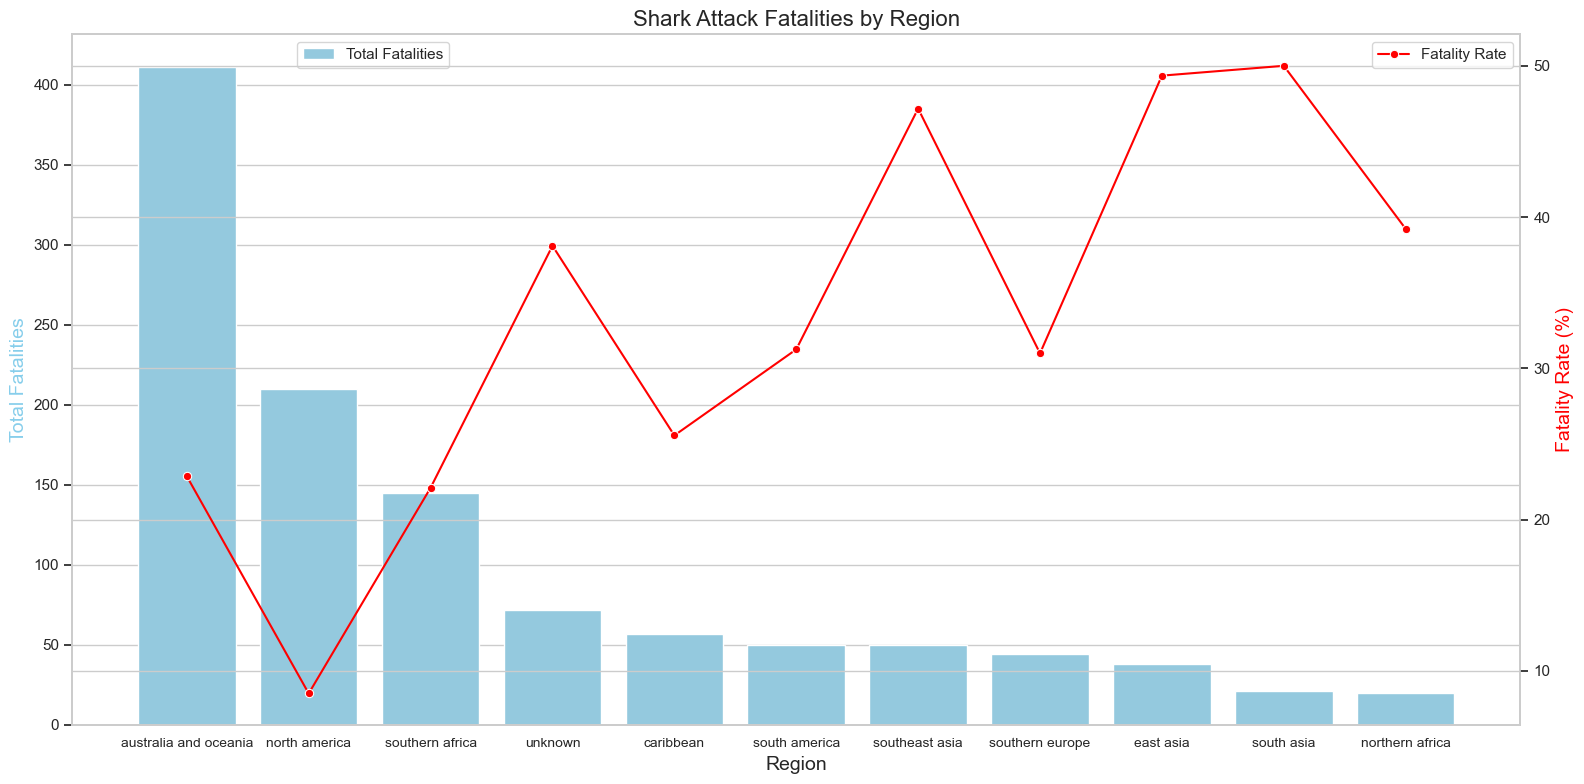

In [12]:
plot_region_fatalities(df_gfm, min_year=1800, exclude_unknown=False, min_cases=100, min_fatalities=20)

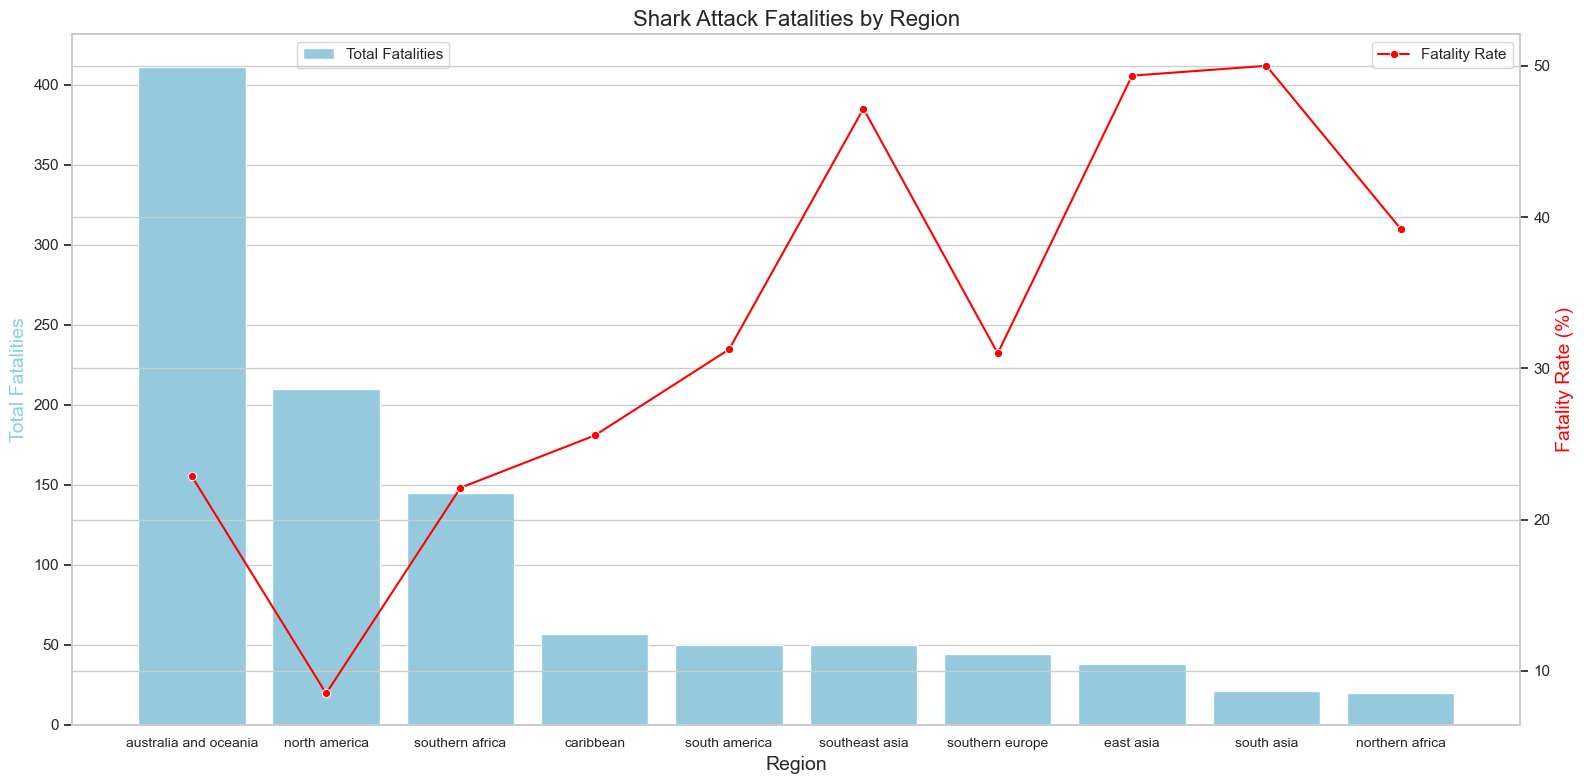

In [13]:
plot_region_fatalities(df_gfm, min_year=1800, exclude_unknown=True, min_cases=100, min_fatalities=20)

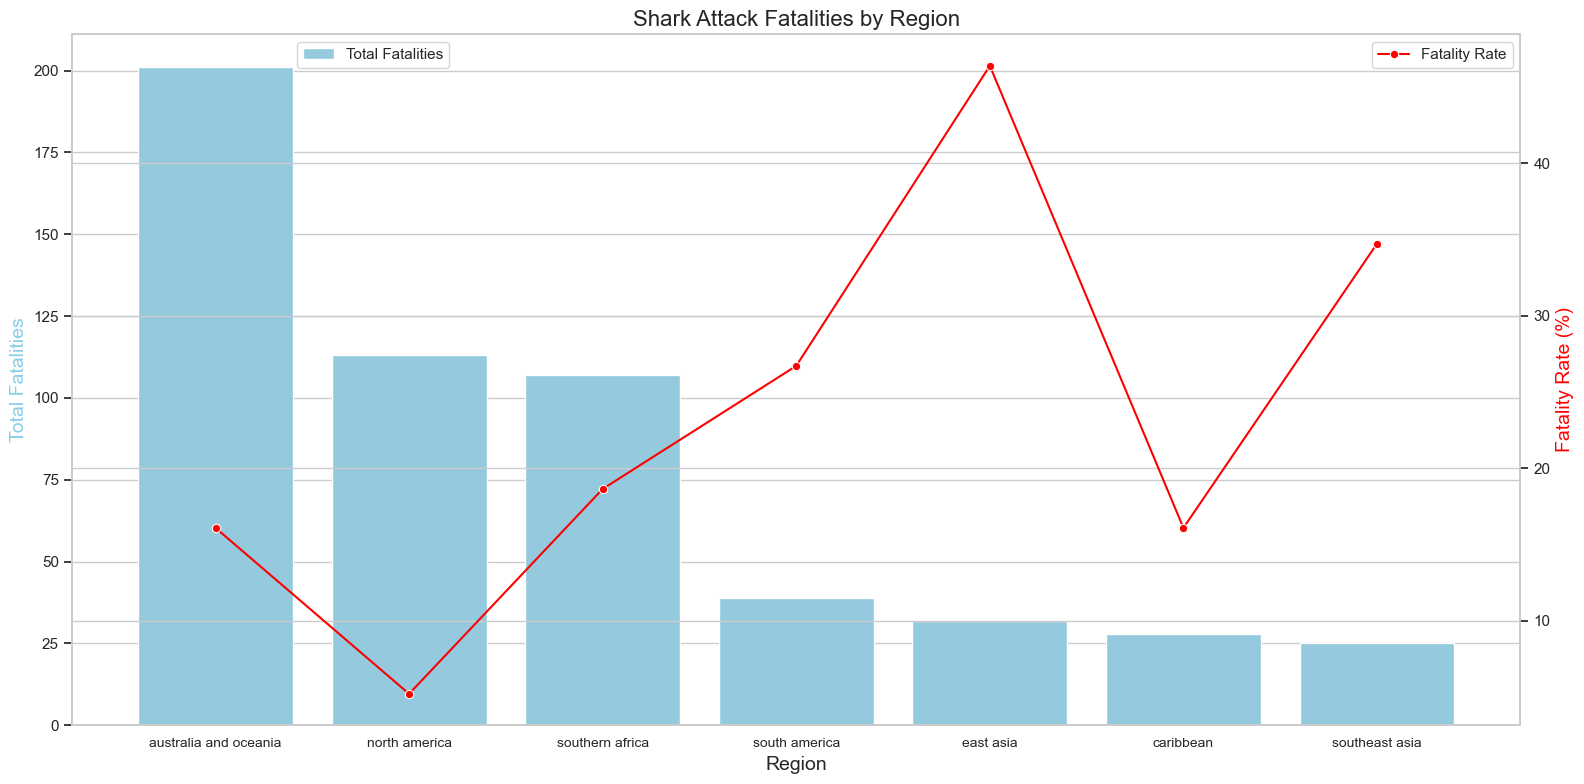

In [14]:
plot_region_fatalities(df_gfm, min_year=1950, exclude_unknown=False, min_cases=100, min_fatalities=20)

-------
# Correlation Between Country and Region Risk Scores

In [15]:
# is there a way to determine which is the real place where is worst in terms of shark attacks fataly rates?

# Group by 'Region' and calculate total cases and fatalities
region_stats = df_filtered.groupby('Region')['Fatal Y/N'].agg(
    total_attacks='count',  # Total attacks (Y + N)
    total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
).reset_index()

# Calculate fatality rate (%)
region_stats['fatality_rate'] = (region_stats['total_fatalities'] / region_stats['total_attacks']) * 100
region_stats['fatality_rate'] = region_stats['fatality_rate'].round(2)

# Calculate risk score
region_stats['risk_score'] = region_stats['fatality_rate'] * region_stats['total_fatalities']

# Sort regions by risk score
region_stats_sorted = region_stats.sort_values('risk_score', ascending=False)

# Display the sorted DataFrame
display(region_stats_sorted[['Region', 'total_attacks', 'total_fatalities', 'fatality_rate', 'risk_score']])

,Region,total_attacks,total_fatalities,fatality_rate,risk_score
0,australia and oceania,1798,411,22.86,9395.46
15,southern africa,656,145,22.10,3204.50
17,unknown,189,72,38.10,2743.20
14,southeast asia,106,50,47.17,2358.50
3,east asia,77,38,49.35,1875.30
7,north america,2470,210,8.50,1785.00
12,south america,160,50,31.25,1562.50
1,caribbean,223,57,25.56,1456.92
16,southern europe,142,44,30.99,1363.56
13,south asia,42,21,50.00,1050.00


In [16]:
# Group by 'Country' and calculate total attacks and fatalities per risk score
country_stats = df_filtered.groupby('Country')['Fatal Y/N'].agg(
    total_attacks='count',  # Total attacks (Y + N)
    total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
).reset_index()

# Calculate fatality rate
country_stats['fatality_rate'] = (country_stats['total_fatalities'] / country_stats['total_attacks']) * 100

# Calculate risk score
country_stats['risk_score'] = country_stats['fatality_rate'] * country_stats['total_fatalities']

# Sort countries by risk score (descending)
country_stats_sorted = country_stats.sort_values('risk_score', ascending=False)

# Display the top 10 worst countries
display(country_stats_sorted[['Country', 'total_attacks', 'total_fatalities', 'fatality_rate', 'risk_score']].head(10))

,Country,total_attacks,total_fatalities,fatality_rate,risk_score
6,australia,1378,280,20.319303,5689.404935
139,unknown,105,46,43.809524,2015.238095
102,philippines,53,32,60.377358,1932.075472
76,mexico,84,40,47.619048,1904.761905
99,papua new guinea,79,37,46.835443,1732.911392
121,south africa,538,96,17.843866,1713.011152
12,brazil,115,38,33.043478,1255.652174
141,usa,2362,167,7.070279,1180.736664
105,reunion,52,24,46.153846,1107.692308
49,hong kong,21,15,71.428571,1071.428571


In [18]:
# Global average fatality rate
global_avg = (df['Fatal Y/N'] == 'Y').mean()

# Bayesian adjustment constant (C)
C = global_avg * 10  # Adjust based on your data

# Calculate adjusted fatality rate
region_stats['adjusted_fatality_rate'] = (
    (region_stats['total_fatalities'] + C) / 
    (region_stats['total_attacks'] + C)
) * 100

In [19]:
# Risk score calculation for countries and regions

# Group by 'Region' and calculate average risk score
region_avg_risk = region_stats.groupby('Region')['risk_score'].mean().reset_index()
region_avg_risk.rename(columns={'risk_score': 'region_avg_risk_score'}, inplace=True)

# Merge country_stats with region_avg_risk
country_region_risk = pd.merge(
    country_stats,
    df_filtered[['Country', 'Region']].drop_duplicates(),  # Map countries to regions
    on='Country',
    how='left'
)

# Merge with region_avg_risk
country_region_risk = pd.merge(
    country_region_risk,
    region_avg_risk,
    on='Region',
    how='left'
)

# Calculate correlation between country risk score and region average risk score
correlation = country_region_risk['risk_score'].corr(country_region_risk['region_avg_risk_score'])
print(f"Correlation between Country Risk Score and Region Average Risk Score: {correlation:.2f}")


Correlation between Country Risk Score and Region Average Risk Score: 0.21


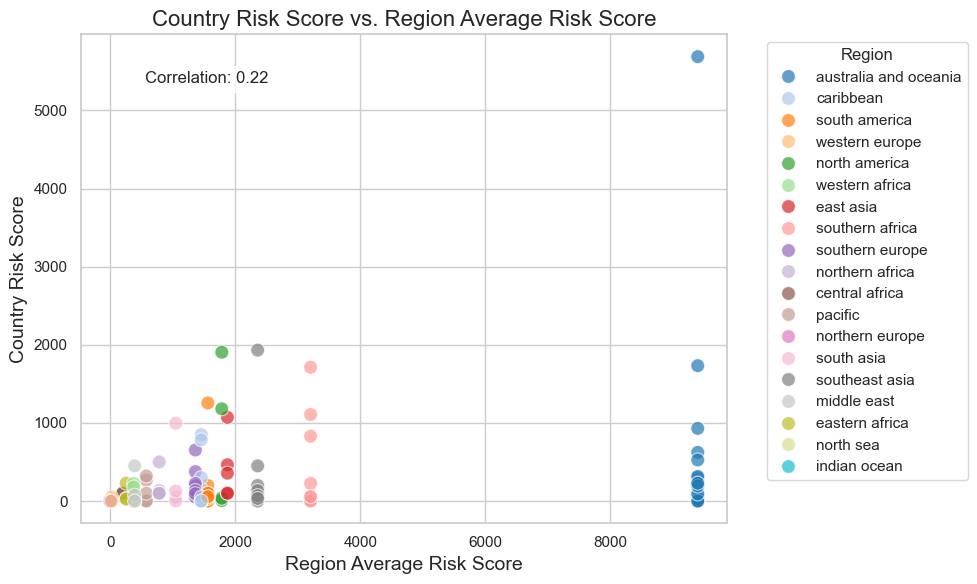

In [54]:
# Plot the relationship between country risk score and region average risk score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_region_risk,
    x='region_avg_risk_score',
    y='risk_score',
    hue='Region',
    palette='tab20',  # Use a distinct color palette
    s=100,  # Adjust bubble size
    alpha=0.7
)

# Add labels and title
plt.title('Country Risk Score vs. Region Average Risk Score', fontsize=16)
plt.xlabel('Region Average Risk Score', fontsize=14)
plt.ylabel('Country Risk Score', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.grid(True)

# Add correlation value to the plot
plt.text(
    0.1, 0.9,  # Position of the text
    f'Correlation: {correlation:.2f}',
    transform=plt.gca().transAxes,  # Use axes coordinates
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)  # Add a background box
)

plt.tight_layout()
plt.show()

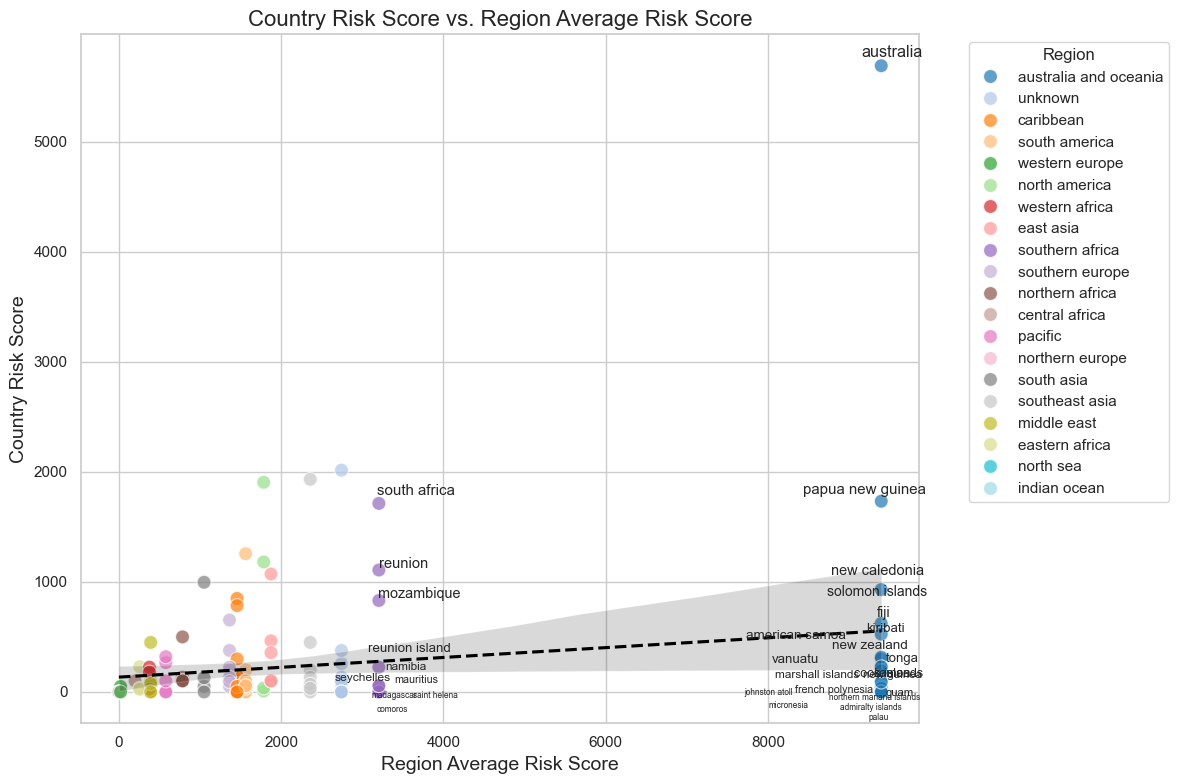

In [20]:

from adjustText import adjust_text  # Import the adjustText library

# Filter the data to only include 'australia and oceania' and 'southern africa'
filtered_data = country_region_risk[country_region_risk['Region'].isin(['australia and oceania', 'southern africa'])]

# Plot the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=country_region_risk,
    x='region_avg_risk_score',
    y='risk_score',
    hue='Region',
    palette='tab20',
    s=100,
    alpha=0.7
)

# Add labels only for the filtered regions
texts = []
for i, row in filtered_data.iterrows():
    # Logarithmic scaling for font size
    log_fontsize = 6 + 1.5 * np.log10(row['risk_score'] + 1)  # +1 to avoid log(0)
    texts.append(plt.text(
        row['region_avg_risk_score'] + 10,  # X position (slightly offset)
        row['risk_score'] + 10,             # Y position (slightly offset)
        row['Country'],                     # Country name
        fontsize=log_fontsize,              # Logarithmically scaled font size
        ha='left',
        va='bottom'
    ))

'''# Add labels only for the filtered regions
texts = []
for i, row in filtered_data.iterrows():
    # Exponential scaling for font size
    exp_fontsize = 3 * (row['risk_score'] ** 0.2)  # Adjust the exponent (0.3) for smoother scaling
    texts.append(plt.text(
        row['region_avg_risk_score'] + 10,  # X position (slightly offset)
        row['risk_score'] + 10,             # Y position (slightly offset)
        row['Country'],                     # Country name
        fontsize=exp_fontsize,              # Exponentially scaled font size
        ha='left',
        va='bottom'
    )) '''

# Adjust labels to avoid overlap
adjust_text(texts)

# Add a trendline
sns.regplot(
    data=country_region_risk,
    x='region_avg_risk_score',
    y='risk_score',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--'}
)

# Add labels and title
plt.title('Country Risk Score vs. Region Average Risk Score', fontsize=16)
plt.xlabel('Region Average Risk Score', fontsize=14)
plt.ylabel('Country Risk Score', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Plot the fatality rate by country since 1800

def plot_country_fatality_rate(df, min_year=None, exclude_unknown=True, min_cases=100, min_fatalities=20):
    """
    Plot shark attack fatality rate by country based on filtering criteria.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        min_year (int): The minimum year to filter by (e.g., 1800).
        exclude_unknown (bool): Whether to exclude 'unknown' countries.
        min_cases (int): Minimum number of cases for a country to be included.
        min_fatalities (int): Minimum number of fatalities for a country to be included.
    """
    # Convert 'Date' to datetime and extract year
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year

    # Filter data based on min_year
    if min_year is not None:
        df = df[df['Year'] >= min_year]

    # Filter out 'unknown' countries if exclude_unknown is True
    if exclude_unknown:
        df = df[df['Country'] != 'unknown']

    # Group by 'Country' and calculate total cases/fatalities
    country_stats = df.groupby('Country')['Fatal Y/N'].agg(
        total_cases='count',
        total_fatalities=lambda x: (x == 'Y').sum()
    ).reset_index()

    # Filter countries with ≥min_cases OR ≥min_fatalities
    filtered_countries = country_stats[
        (country_stats['total_cases'] >= min_cases) | (country_stats['total_fatalities'] >= min_fatalities)
    ]

    # Merge back with the filtered data
    df_filtered_countries = df[df['Country'].isin(filtered_countries['Country'])]

    # Group by 'Country' and calculate
    country_fatalities = df_filtered_countries.groupby('Country')['Fatal Y/N'].agg(
        total_attacks='count',  # Total attacks (Y + N)
        total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
    ).reset_index()

    # Calculate fatality rate and round to 2 decimals
    country_fatalities['Fatality Rate (%)'] = (
        country_fatalities['total_fatalities'] / country_fatalities['total_attacks']
    ) * 100
    country_fatalities['Fatality Rate (%)'] = country_fatalities['Fatality Rate (%)'].round(2)

    # Sort by fatality rate (descending)
    country_fatalities_sorted = country_fatalities.sort_values('Fatality Rate (%)', ascending=False)

    # Plot the fatality rate by country
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=country_fatalities_sorted,
        x='Country',
        y='Fatality Rate (%)',
        palette='Reds'
    )

    # Add labels and title
    title = 'Fatality Rate by Country'
    if min_year is not None:
        title += f' (Since {min_year})'
    if min_cases is not None:
        title += f' (≥{min_cases} Cases)'
    if min_fatalities is not None:
        title += f' (≥{min_fatalities} Fatalities)'
    if exclude_unknown:
        title += ' (Excluding "unknown")'
    plt.title(title, fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Fatality Rate (%)', fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80776/1458072194.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


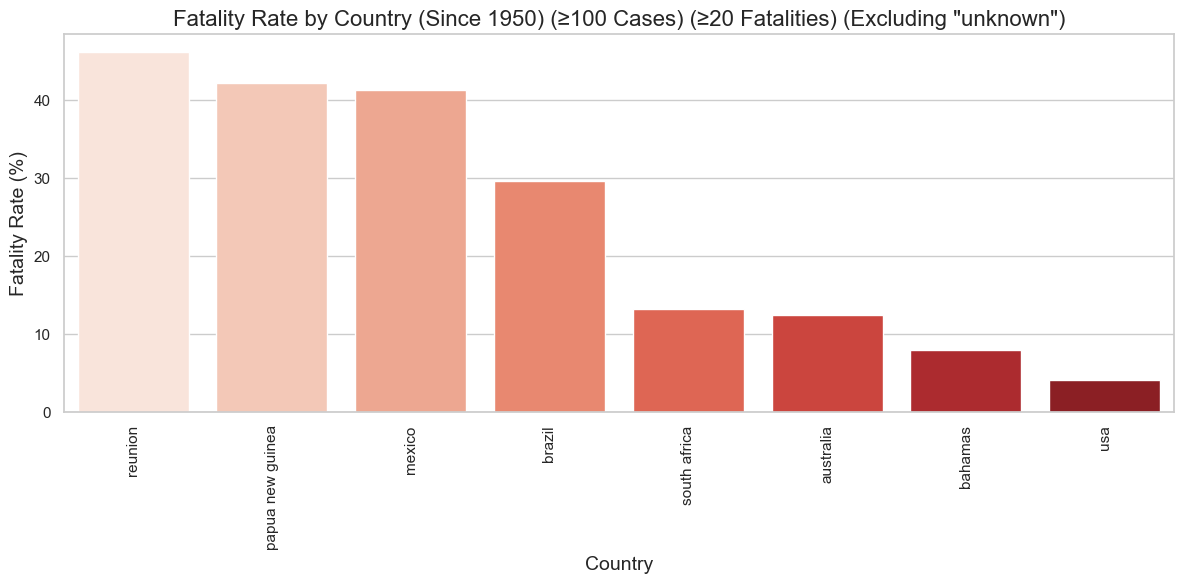

In [22]:
# Example usage
plot_country_fatality_rate(
    df=df,  # Your DataFrame
    min_year=1950,  # Filter data from 1950 onwards
    exclude_unknown=True,  # Exclude 'unknown' countries
    min_cases=100,  # Include only countries with at least 100 total cases
    min_fatalities=20  # Include only countries with at least 20 fatalities
)

-------
# DRAFTS / UNUSED PLOTS 👇

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_78447/925447891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cross_tab_region_sorted.reset_index(), x='Region', y='Fatality Rate (%)', palette='Reds')


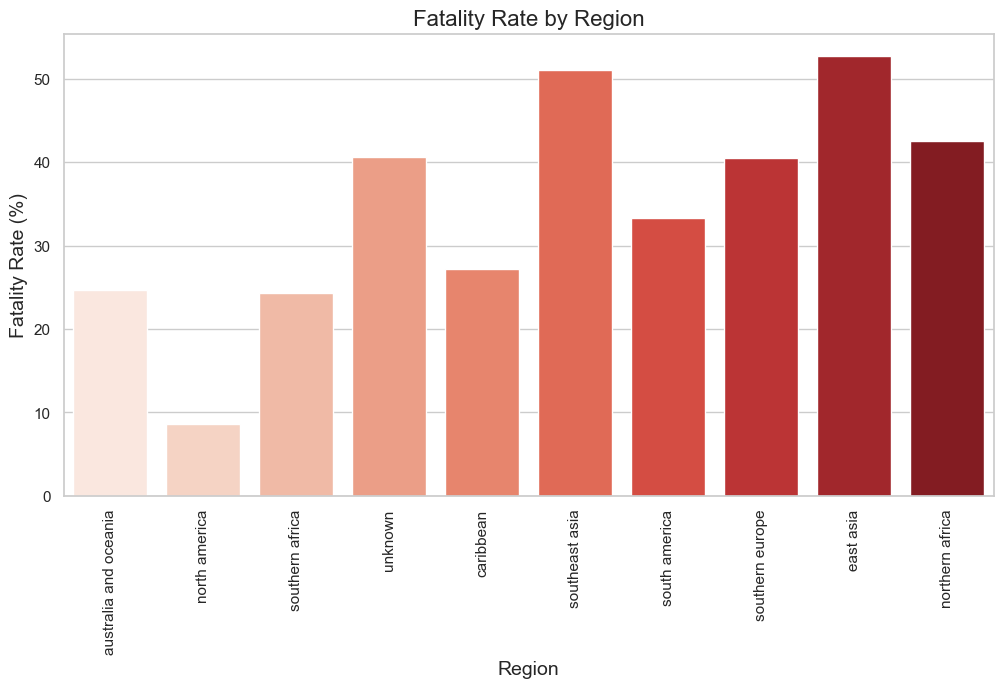

In [48]:
# Plot the fatality rate by region
plt.figure(figsize=(12, 6))
sns.barplot(data=cross_tab_region_sorted.reset_index(), x='Region', y='Fatality Rate (%)', palette='Reds')

# Add labels and title
plt.title('Fatality Rate by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_37193/2419039675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Country', y='Fatality Rate (%)', palette='Reds')


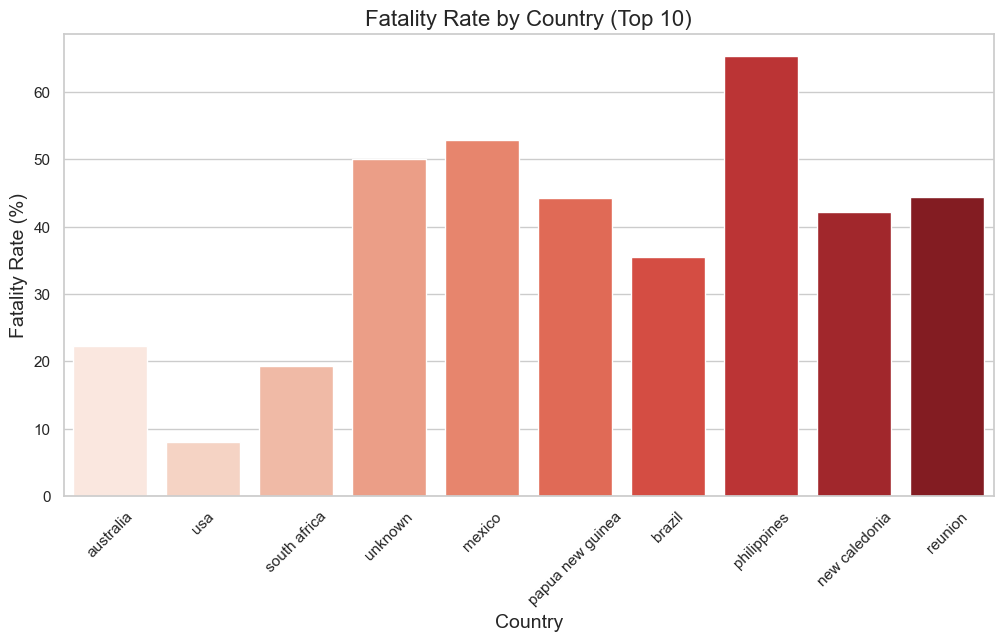

In [44]:
# Plot the fatality rate by country (top 10)
top_countries = cross_tab_country_sorted.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Country', y='Fatality Rate (%)', palette='Reds')

# Add labels and title
plt.title('Fatality Rate by Country (Top 10)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [14]:
# Create a new 'Fatal' column (1 for 'Y', 0 for 'N', NaN for 'U')
df_gfm['Fatal'] = df_gfm['Fatal Y/N'].map({'Y': 1, 'N': 0, 'U': np.nan})

# Drop rows where 'Fatal' is NaN (unknown cases)
df_gfm = df_gfm.dropna(subset=['Fatal'])

In [15]:
# Group by 'Region' and calculate
region_fatalities = df_gfm.groupby('Region')['Fatal'].agg(
    total_attacks='count',  # Total attacks (Y + N, excluding U)
    total_fatalities='sum'  # Total fatalities (Y)
).reset_index()

# Calculate fatality rate (%)
region_fatalities['fatality_rate'] = (region_fatalities['total_fatalities'] / region_fatalities['total_attacks']) * 100

-----   

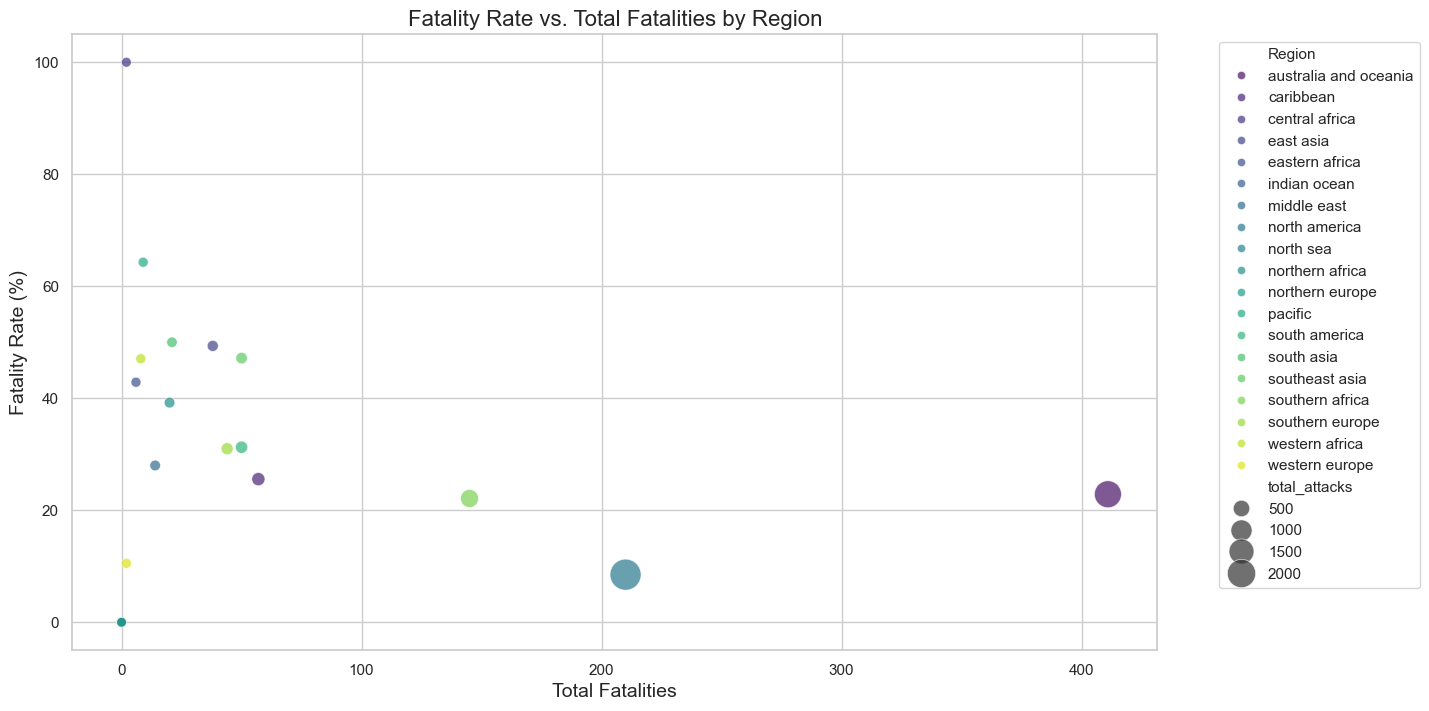

In [30]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=region_stats,
    x='total_fatalities',
    y='fatality_rate',
    size='total_attacks',
    hue='Region',
    sizes=(50, 500),
    alpha=0.7,
    palette='viridis'
)

# Highlight high-risk regions
plt.title('Fatality Rate vs. Total Fatalities by Region', fontsize=16)
plt.xlabel('Total Fatalities', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

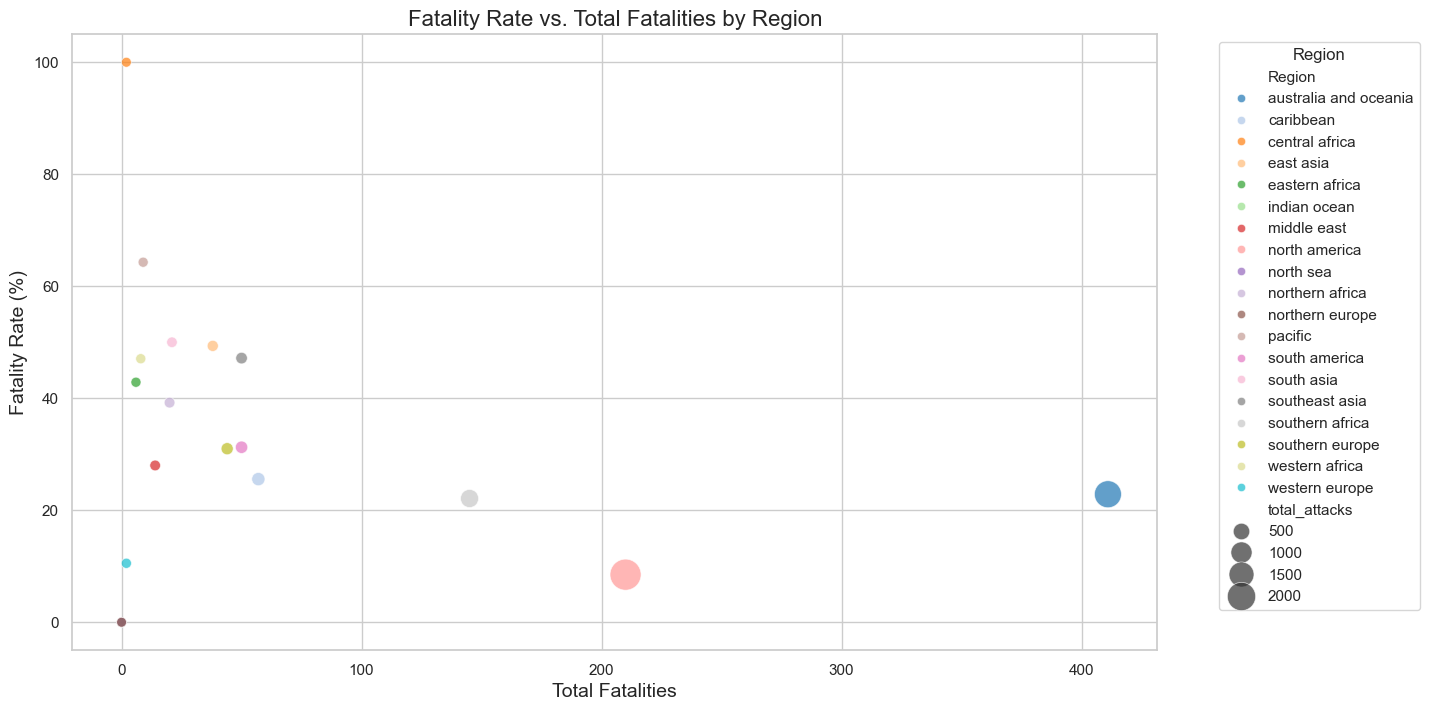

In [35]:
# Set up the plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=region_stats,
    x='total_fatalities',
    y='fatality_rate',
    size='total_attacks',
    hue='Region',
    sizes=(50, 500),  # Adjust bubble sizes
    alpha=0.7,
    palette='tab20'  # Use a distinct color palette
)



# Add labels and title
plt.title('Fatality Rate vs. Total Fatalities by Region', fontsize=16)
plt.xlabel('Total Fatalities', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.grid(True)
plt.show()

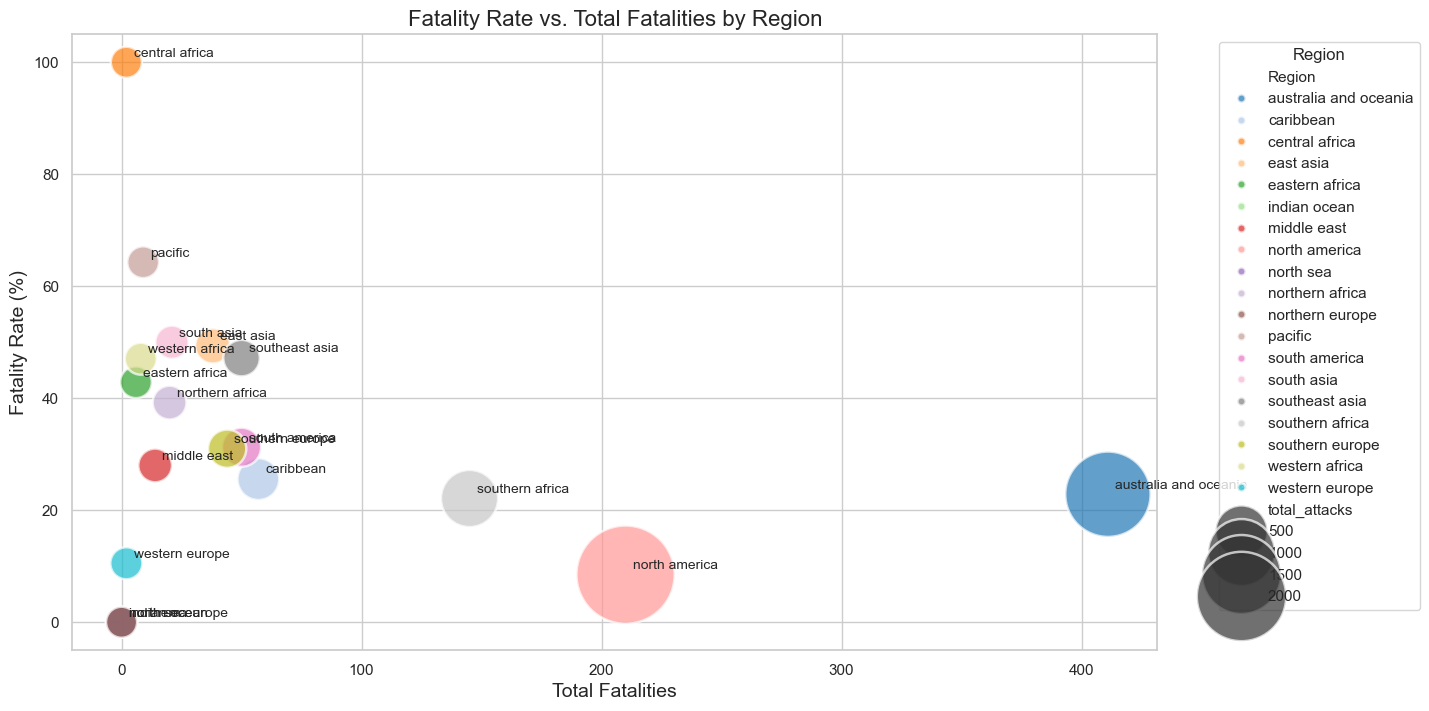

In [ ]:
# 1️⃣ Bubble plot with labels and a distinct color palette  next to dots

plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=region_stats,
    x='total_fatalities',
    y='fatality_rate',
    size='total_attacks',
    hue='Region',
    sizes=(1000, 1000),  # Adjust bubble sizes
    alpha=0.7,
    palette='tab20'  # Use a distinct color palette
)

# Add labels to the bubbles
for i, row in region_stats.iterrows():
    plt.text(
        row['total_fatalities'] + 3,  # X position (slightly offset)
        row['fatality_rate'] + 0.5,   # Y position (slightly offset)
        row['Region'],                # Region name
        fontsize=10,
        ha='left',                    # Horizontal alignment
        va='bottom'                   # Vertical alignment
    )

# Highlight high-risk regions
plt.title('Fatality Rate vs. Total Fatalities by Region', fontsize=16)
plt.xlabel('Total Fatalities', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.grid(True)
plt.show()

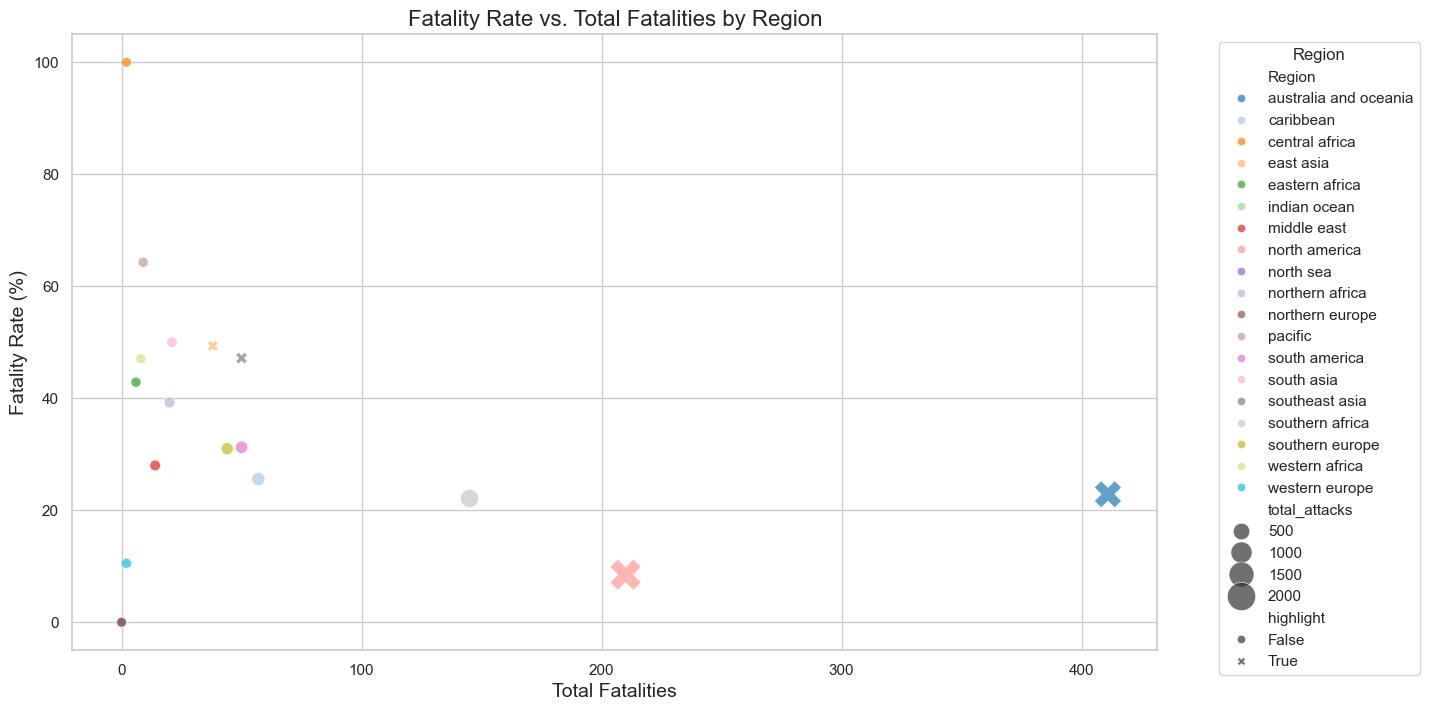

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a 'highlight' column to mark specific regions
region_stats['highlight'] = region_stats['Region'].isin([
    'australia and oceania', 'north america', 'southeast asia', 'east asia'
])

# Plot the bubble chart
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=region_stats,
    x='total_fatalities',
    y='fatality_rate',
    size='total_attacks',
    hue='Region',
    style='highlight',  # Use different markers for highlighted regions
    markers={True: 'X', False: 'o'},  # 'X' for highlighted, 'o' for others
    sizes=(50, 500),  # Adjust bubble sizes
    alpha=0.7,
    palette='tab20'  # Use a distinct color palette
)

'''# Add labels to the bubbles
for i, row in region_stats.iterrows():
    plt.text(
        row['total_fatalities'] + 1,  # X position (slightly offset)
        row['fatality_rate'] + 0.5,   # Y position (slightly offset)
        row['Region'],                # Region name
        fontsize=10,
        ha='left',                    # Horizontal alignment
        va='bottom'                   # Vertical alignment
    )'''

# Highlight high-risk regions
plt.title('Fatality Rate vs. Total Fatalities by Region', fontsize=16)
plt.xlabel('Total Fatalities', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.grid(True)
plt.show()

In [46]:
# Calculate fatality rate
region_stats['fatality_rate'] = (region_stats['total_fatalities'] / region_stats['total_attacks']) * 100

# Calculate risk score
region_stats['risk_score'] = region_stats['fatality_rate'] * region_stats['total_fatalities']

# Sort regions by risk score (descending)
region_stats_sorted = region_stats.sort_values('risk_score', ascending=False)

# Display the top 10 worst regions
display(region_stats_sorted[['Region', 'total_attacks', 'total_fatalities', 'fatality_rate', 'risk_score']].head(10))

,Region,total_attacks,total_fatalities,fatality_rate,risk_score
0,australia and oceania,1798,411,22.858732,9394.938821
15,southern africa,656,145,22.103659,3205.030488
14,southeast asia,106,50,47.169811,2358.490566
3,east asia,77,38,49.350649,1875.324675
7,north america,2470,210,8.502024,1785.425101
12,south america,160,50,31.250000,1562.500000
1,caribbean,223,57,25.560538,1456.950673
16,southern europe,142,44,30.985915,1363.380282
13,south asia,42,21,50.000000,1050.000000
9,northern africa,51,20,39.215686,784.313725


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_59881/3799435634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


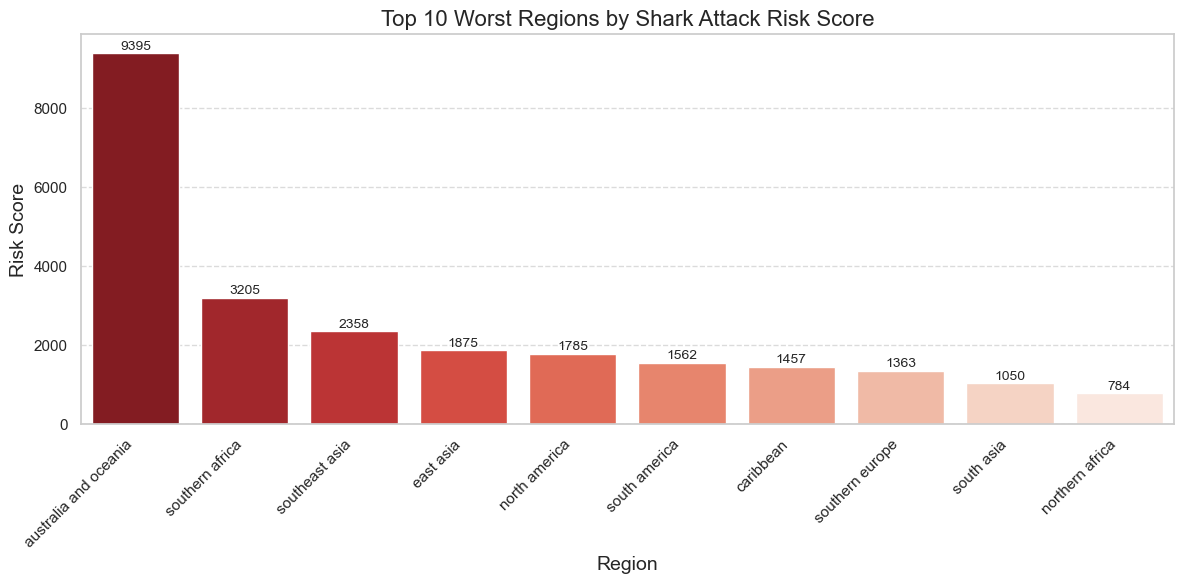

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 10 worst regions
top_10_worst = region_stats_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_worst,
    x='Region',
    y='risk_score',
    palette='Reds_r'  # Use a red color palette for emphasis
)

# Add labels and title
plt.title('Top 10 Worst Regions by Shark Attack Risk Score', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Risk Score', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity

# Add risk score values on top of the bars
for i, score in enumerate(top_10_worst['risk_score']):
    plt.text(i, score + 10, f'{score:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import chi2_contingency

# Example for a specific region (e.g., 'australia and oceania')
region_data = df[df['Region'] == 'australia and oceania']
contingency_table = pd.crosstab(region_data['Fatal Y/N'], columns='count')

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Region: 'australia and oceania', p-value: {p:.4f}")

Region: 'australia and oceania', p-value: 1.0000


In [28]:
correlation = region_stats['total_attacks'].corr(region_stats['total_fatalities'])
print(f"Correlation between total attacks and fatalities: {correlation:.2f}")

Correlation between total attacks and fatalities: 0.86


----
# graphic by country

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_59881/804560079.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


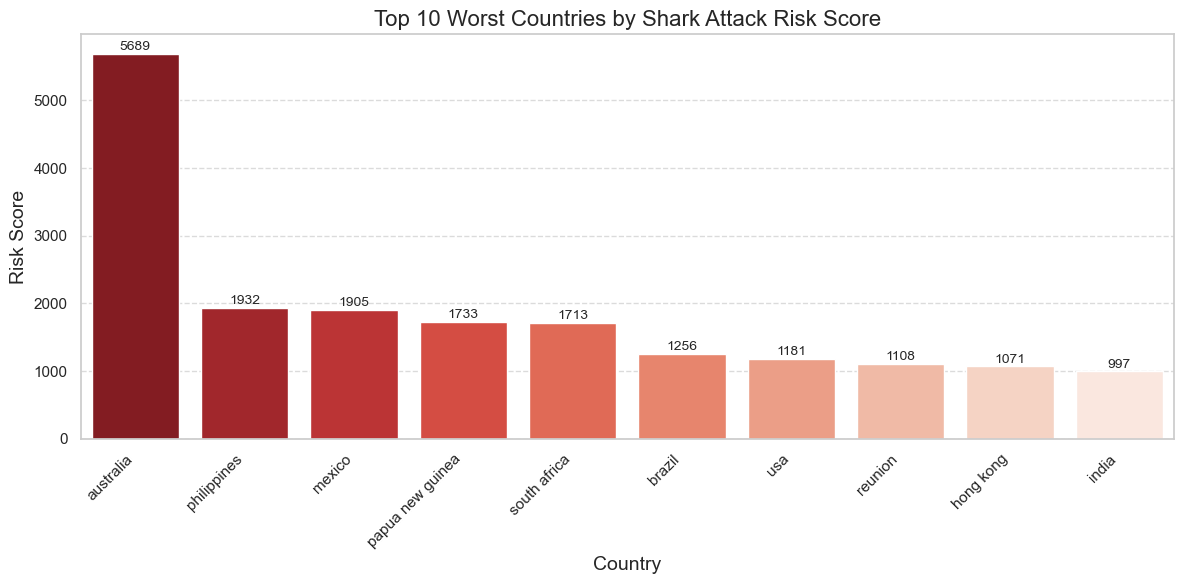

In [50]:
# Select the top 10 worst countries
top_10_worst_countries = country_stats_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_worst_countries,
    x='Country',
    y='risk_score',
    palette='Reds_r'  # Use a red color palette for emphasis
)

# Add labels and title
plt.title('Top 10 Worst Countries by Shark Attack Risk Score', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Risk Score', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity

# Add risk score values on top of the bars
for i, score in enumerate(top_10_worst_countries['risk_score']):
    plt.text(i, score + 10, f'{score:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [14]:
# Convert 'Date' to datetime and extract year
df_gfm['Date'] = pd.to_datetime(df_gfm['Date'], errors='coerce')
df_gfm['Year'] = df_gfm['Date'].dt.year

# Filter data after 1800 and exclude 'unknown' regions
df_filtered = df_gfm[
    (df_gfm['Year'] > 1800) & 
    (df_gfm['Region'] != 'unknown')  # Exclude 'unknown' regions
]

# Group by 'Country' and calculate
country_fatalities = df_filtered.groupby('Country')['Fatal Y/N'].agg(
    total_attacks='count',  # Total attacks (Y + N + U)
    total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
).reset_index()

# Calculate fatality rate (%)
country_fatalities['fatality_rate'] = (country_fatalities['total_fatalities'] / country_fatalities['total_attacks']) * 100
country_fatalities['fatality_rate'] = country_fatalities['fatality_rate'].round(2)

# Set the minimum number of attacks for filtering
min_attacks = 100  # Change this value as needed

# Filter for countries with at least `min_attacks` attacks
country_fatalities_filtered = country_fatalities[country_fatalities['total_attacks'] >= min_attacks]

# Sort by fatality rate and select top 10
top_countries = country_fatalities_filtered.sort_values('fatality_rate', ascending=False).head(10)

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_42374/1052282206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Country', y='fatality_rate', palette='Reds_r')


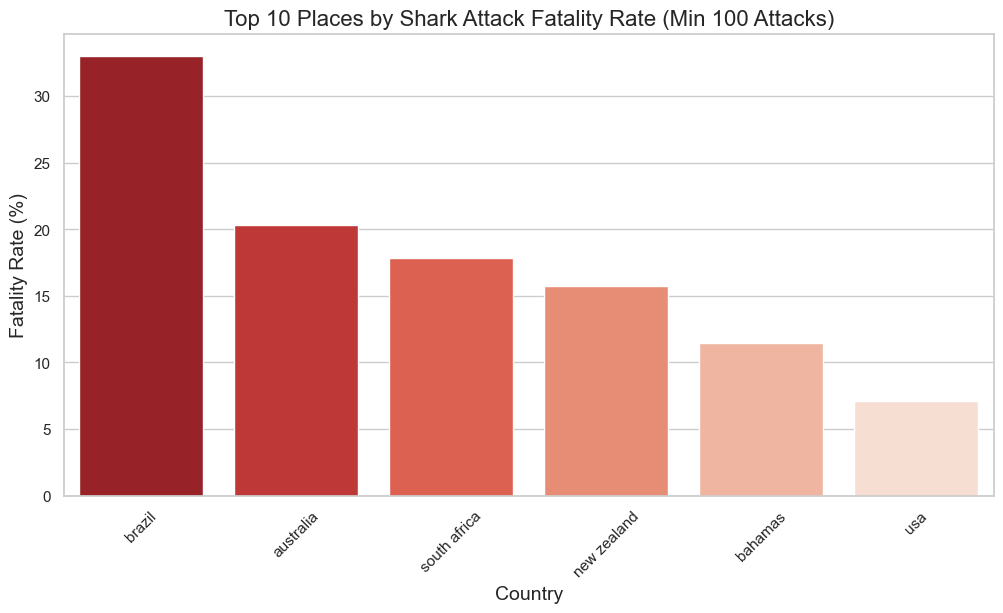

In [15]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Country', y='fatality_rate', palette='Reds_r')

# Add labels and title
plt.title(f'Top 10 Places by Shark Attack Fatality Rate (Min {min_attacks} Attacks)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [16]:
# Convert 'Date' to datetime and extract year
df_gfm['Date'] = pd.to_datetime(df_gfm['Date'], errors='coerce')
df_gfm['Year'] = df_gfm['Date'].dt.year

# Filter data after 1800 and exclude 'unknown' regions
df_filtered = df_gfm[
    (df_gfm['Year'] > 1800) & 
    (df_gfm['Region'] != 'unknown')  # Exclude 'unknown' regions
]

# Group by 'Country' and calculate
country_fatalities = df_filtered.groupby('Country')['Fatal Y/N'].agg(
    total_attacks='count',  # Total attacks (Y + N + U)
    total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
).reset_index()

# Calculate fatality rate (%)
country_fatalities['fatality_rate'] = (country_fatalities['total_fatalities'] / country_fatalities['total_attacks']) * 100
country_fatalities['fatality_rate'] = country_fatalities['fatality_rate'].round(2)

# Filter for countries with at least 10 attacks (change this value as needed)
min_attacks = 10
country_fatalities_filtered = country_fatalities[country_fatalities['total_attacks'] >= min_attacks]

# Sort by total fatalities (descending)
country_fatalities_sorted = country_fatalities_filtered.sort_values('total_fatalities', ascending=False)

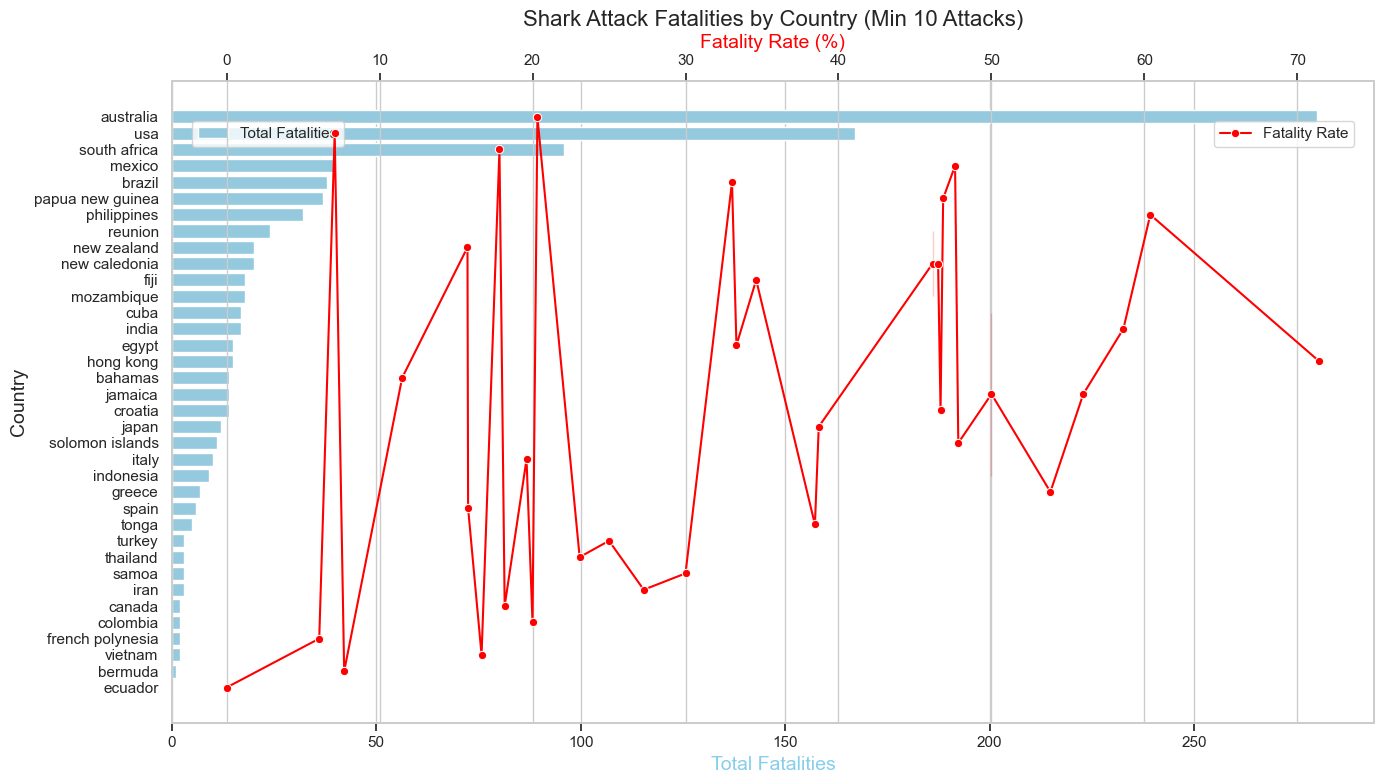

In [17]:

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Horizontal bar plot for total fatalities
ax = sns.barplot(
    data=country_fatalities_sorted,
    y='Country', x='total_fatalities', color='skyblue', label='Total Fatalities'
)

# Line plot for fatality rate
ax2 = ax.twiny()  # Use twiny() for horizontal alignment
sns.lineplot(
    data=country_fatalities_sorted,
    y='Country', x='fatality_rate', color='red', marker='o', label='Fatality Rate', ax=ax2
)

# Add labels and title
plt.title(f'Shark Attack Fatalities by Country (Min {min_attacks} Attacks)', fontsize=16)
ax.set_xlabel('Total Fatalities', fontsize=14, color='skyblue')
ax.set_ylabel('Country', fontsize=14)
ax2.set_xlabel('Fatality Rate (%)', fontsize=14, color='red')

# Reposition the legends to avoid overlap
ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.95), frameon=True)
ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.95), frameon=True)

plt.tight_layout()
plt.show()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_37193/1850098552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Country', y='fatality_rate', palette='Reds_r')


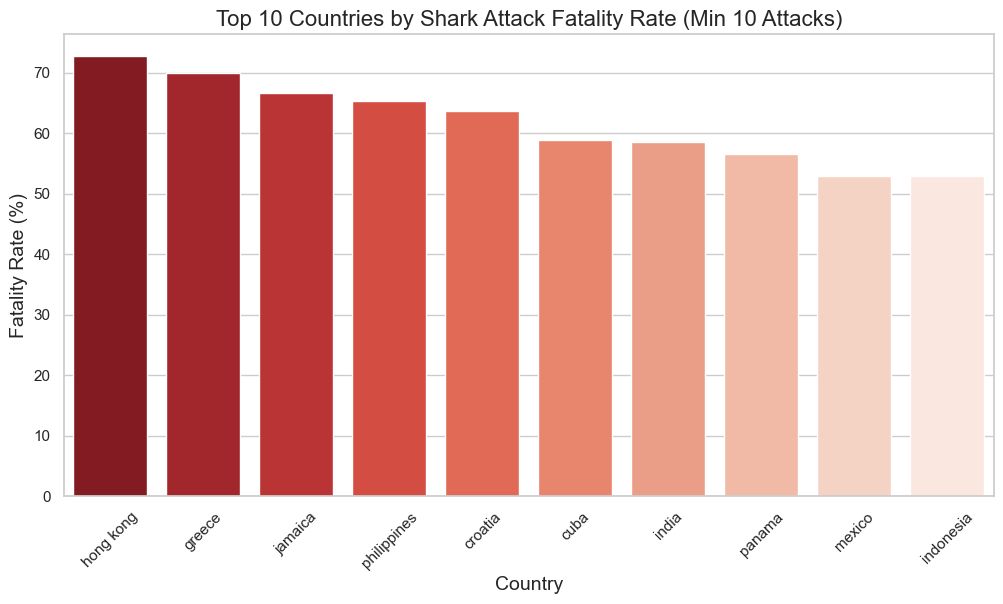

In [15]:
# Sort and select top 10
top_countries = country_fatalities.sort_values('fatality_rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Country', y='fatality_rate', palette='Reds_r')

plt.title('Top 10 Countries by Shark Attack Fatality Rate (Min 10 Attacks)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [39]:
from scipy.stats import chi2_contingency
import numpy as np

# Example for one region (e.g., 'australia and oceania')
region_data = df_filtered[df_filtered['Region'] == 'australia and oceania']

# Create contingency table
contingency_table = pd.crosstab(region_data['Year'], region_data['Fatal Y/N'])

# Drop 'U' (unknown) and ensure only 'Y'/'N'
contingency_table = contingency_table[['N', 'Y']]

# Filter out years with zero counts for either 'N' or 'Y'
contingency_table = contingency_table[(contingency_table['N'] > 0) & (contingency_table['Y'] > 0)]

# Perform chi-square test and calculate Cramer’s V
if not contingency_table.empty:
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square p-value for region: {p:.4f}")
    
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    print(f"Cramer’s V: {cramers_v:.2f}")
else:
    print("Insufficient data for chi-square test and Cramer’s V.")

Chi-square p-value for region: 0.0000
Cramer’s V: 0.40


In [40]:
# Group by 'Country' and calculate total attacks and fatalities
country_stats = df_filtered.groupby('Country')['Fatal Y/N'].agg(
    total_attacks='count',  # Total attacks (Y + N + U)
    total_fatalities=lambda x: (x == 'Y').sum()  # Total fatalities (Y)
).reset_index()

# Calculate fatality rate (%)
country_stats['fatality_rate'] = (country_stats['total_fatalities'] / country_stats['total_attacks']) * 100
country_stats['fatality_rate'] = country_stats['fatality_rate'].round(2)

# Filter for countries with at least 10 attacks (to avoid small sample bias)
min_attacks = 10
country_stats_filtered = country_stats[country_stats['total_attacks'] >= min_attacks]

# Sort and select top 10 countries by total attacks
top_10_by_attacks = country_stats_filtered.sort_values('total_attacks', ascending=False).head(10)

# Sort and select top 10 countries by fatality rate
top_10_by_fatality_rate = country_stats_filtered.sort_values('fatality_rate', ascending=False).head(10)

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_42374/1364828163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_by_attacks, x='Country', y='total_attacks', palette='Blues')


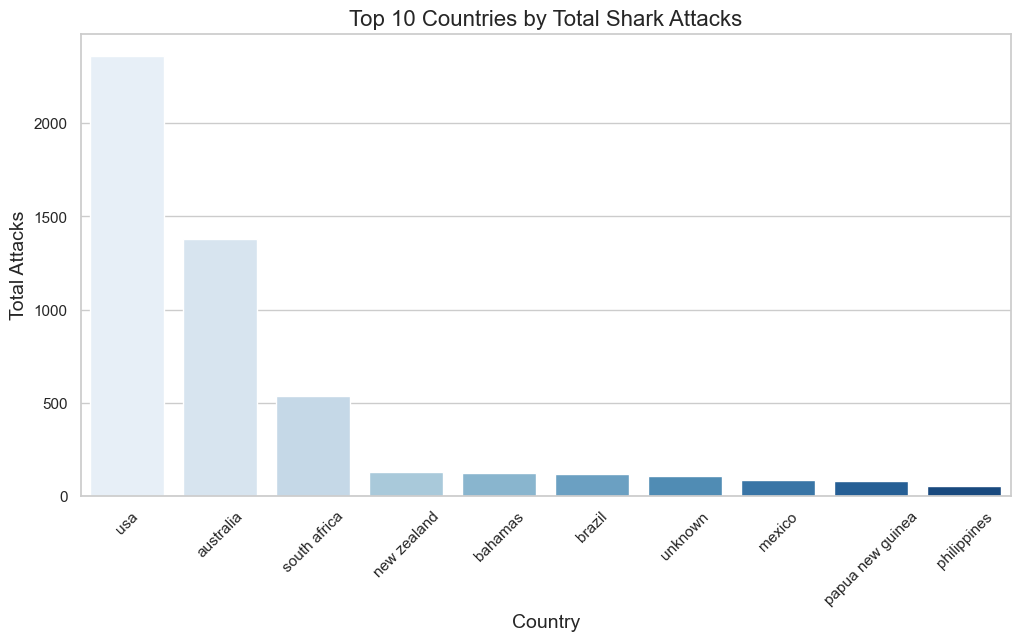

In [41]:
# Plot top 10 countries by fatality rate

# Plot top 10 countries by total attacks
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_by_attacks, x='Country', y='total_attacks', palette='Blues')

# Add labels and title
plt.title('Top 10 Countries by Total Shark Attacks', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Attacks', fontsize=14)
plt.xticks(rotation=45)
plt.show()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_42374/4049427496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_by_fatality_rate, x='Country', y='fatality_rate', palette='Reds')


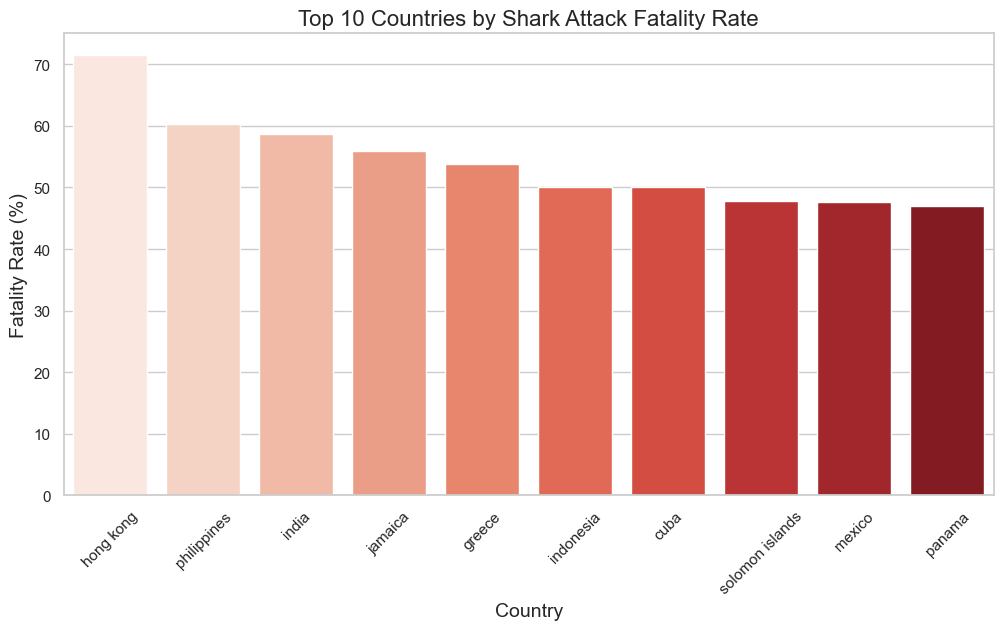

In [42]:
# Plot top 10 countries by fatality rate
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_by_fatality_rate, x='Country', y='fatality_rate', palette='Reds')

# Add labels and title
plt.title('Top 10 Countries by Shark Attack Fatality Rate', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

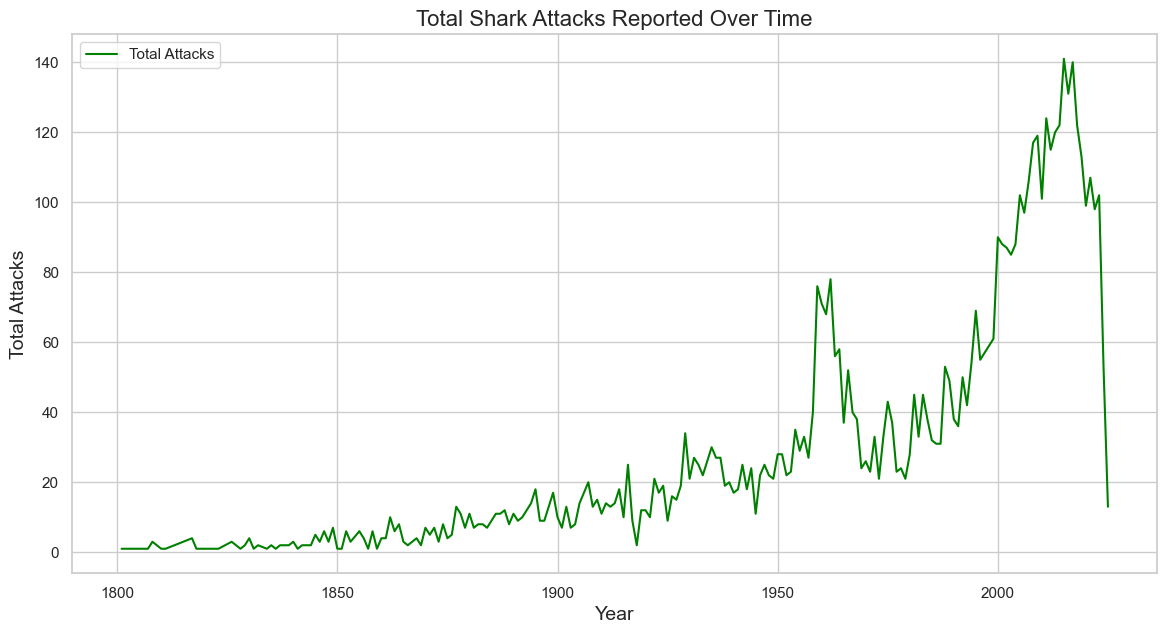

In [49]:
# Plot total attacks over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_stats, x='Year', y='total_attacks', color='green', label='Total Attacks')

# Add labels and title
plt.title('Total Shark Attacks Reported Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Attacks', fontsize=14)
plt.grid(True)
plt.show()

In [58]:
# Define the cutoff year
cutoff_year = 1850  # Change to 1950 if needed

# Split the data into two groups: before and after the cutoff year
before_cutoff = yearly_stats[yearly_stats['Year'] < cutoff_year]
after_cutoff = yearly_stats[yearly_stats['Year'] >= cutoff_year]

# Calculate average fatality rates
avg_fatal_before = before_cutoff['fatal_percentage'].mean()
avg_fatal_after = after_cutoff['fatal_percentage'].mean()

print(f"Average Fatality Rate Before {cutoff_year}: {avg_fatal_before:.2f}%")
print(f"Average Fatality Rate After {cutoff_year}: {avg_fatal_after:.2f}%")

Average Fatality Rate Before 1850: 55.12%
Average Fatality Rate After 1850: 32.56%


In [59]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(before_cutoff['fatal_percentage'], after_cutoff['fatal_percentage'], nan_policy='omit')

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 4.56
P-value: 0.0000


In [122]:
# Calculate correlation between country risk score and region average risk score
correlation = country_region_risk['risk_score'].corr(country_region_risk['region_avg_risk_score'])
print(f"Correlation between Country Risk Score and Region Average Risk Score: {correlation:.2f}")

Correlation between Country Risk Score and Region Average Risk Score: 0.22


In [72]:
# Calculate correlation between total attacks and fatality rate
correlation = region_stats['total_attacks'].corr(region_stats['fatality_rate'])
print(f"Correlation between total attacks and fatality rate: {correlation:.2f}")

Correlation between total attacks and fatality rate: -0.27


In [123]:

# Group by 'Region' and calculate average risk score
region_avg_risk = region_stats.groupby('Region')['risk_score'].mean().reset_index()
region_avg_risk.rename(columns={'risk_score': 'region_avg_risk_score'}, inplace=True)

-----
# Plots with graphic errors or confusing

### or plots used to try things:

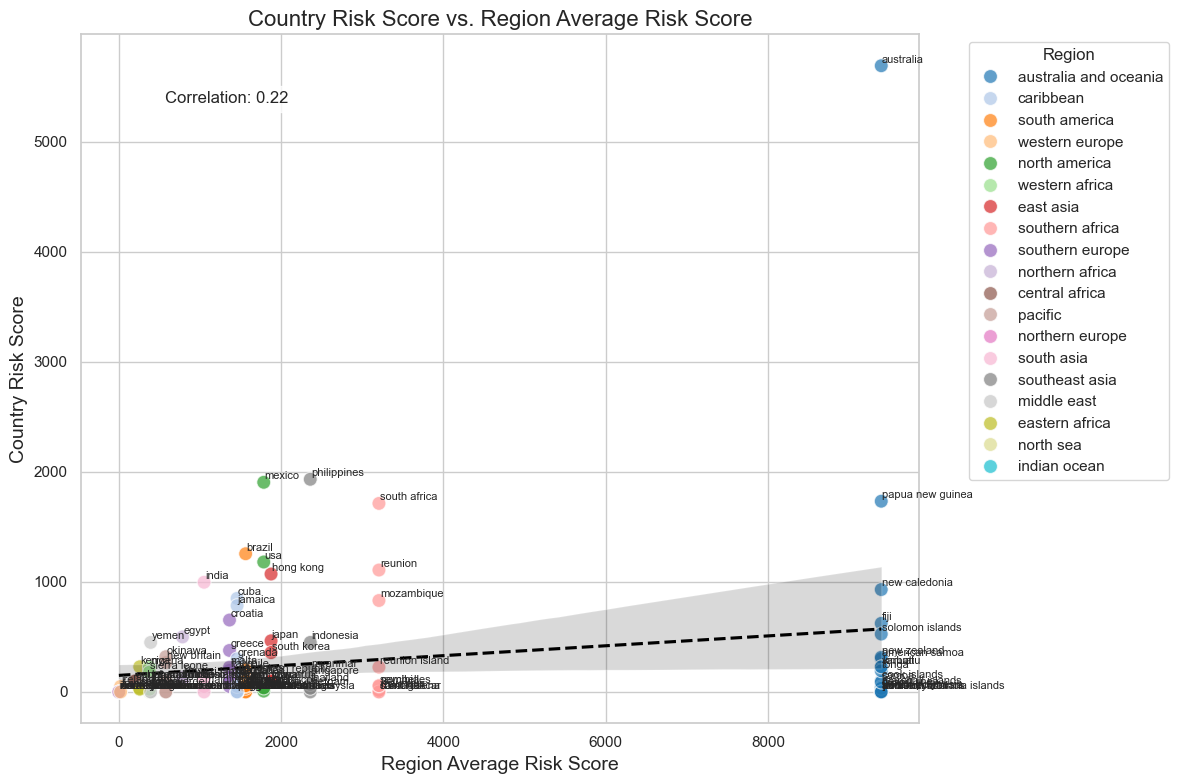

In [57]:
# Plot the relationship between country risk score and region average risk score
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=country_region_risk,
    x='region_avg_risk_score',
    y='risk_score',
    hue='Region',
    palette='tab20',  # Use a distinct color palette
    s=100,  # Adjust bubble size
    alpha=0.7
)

# Add country labels
for i, row in country_region_risk.iterrows():
    plt.text(
        row['region_avg_risk_score'] + 10,  # X position (slightly offset)
        row['risk_score'] + 10,             # Y position (slightly offset)
        row['Country'],                     # Country name
        fontsize=8,
        ha='left',                          # Horizontal alignment
        va='bottom'                         # Vertical alignment
    )

# Add a trendline
sns.regplot(
    data=country_region_risk,
    x='region_avg_risk_score',
    y='risk_score',
    scatter=False,  # Don't plot the scatter points again
    color='black',  # Trendline color
    line_kws={'linestyle': '--'}  # Dashed line
)

# Add labels and title
plt.title('Country Risk Score vs. Region Average Risk Score', fontsize=16)
plt.xlabel('Region Average Risk Score', fontsize=14)
plt.ylabel('Country Risk Score', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region')
plt.grid(True)

# Add correlation value to the plot
plt.text(
    0.1, 0.9,  # Position of the text
    f'Correlation: {correlation:.2f}',
    transform=plt.gca().transAxes,  # Use axes coordinates
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)  # Add a background box
)

plt.tight_layout()
plt.show()

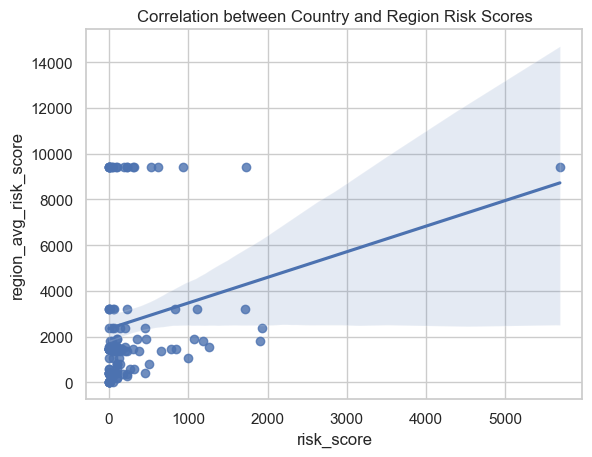

In [56]:
# Assuming 'data' is your DataFrame containing 'Country_Risk' and 'Region_Risk' columns
sns.regplot(x='risk_score', y='region_avg_risk_score', data=country_region_risk)
plt.title('Correlation between Country and Region Risk Scores')
plt.show()

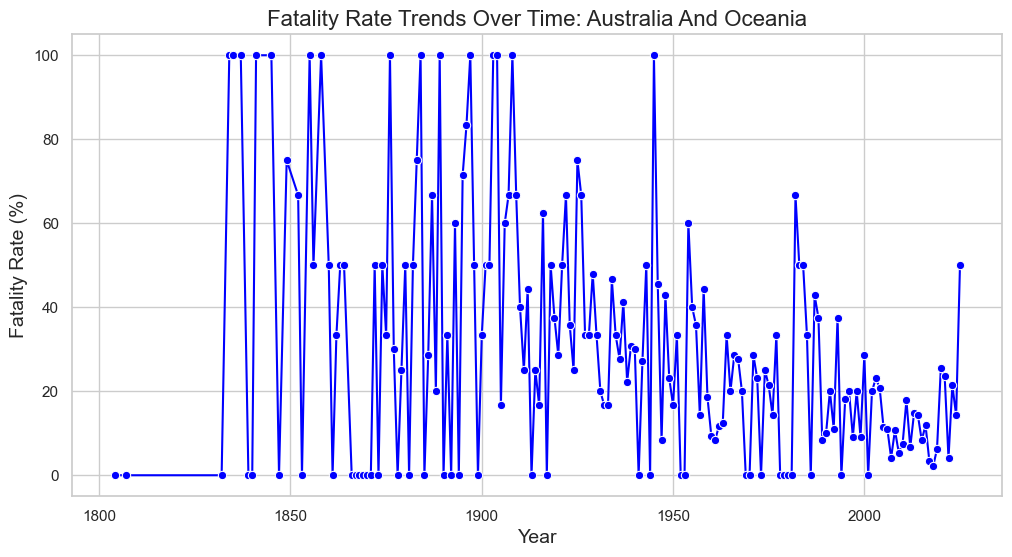

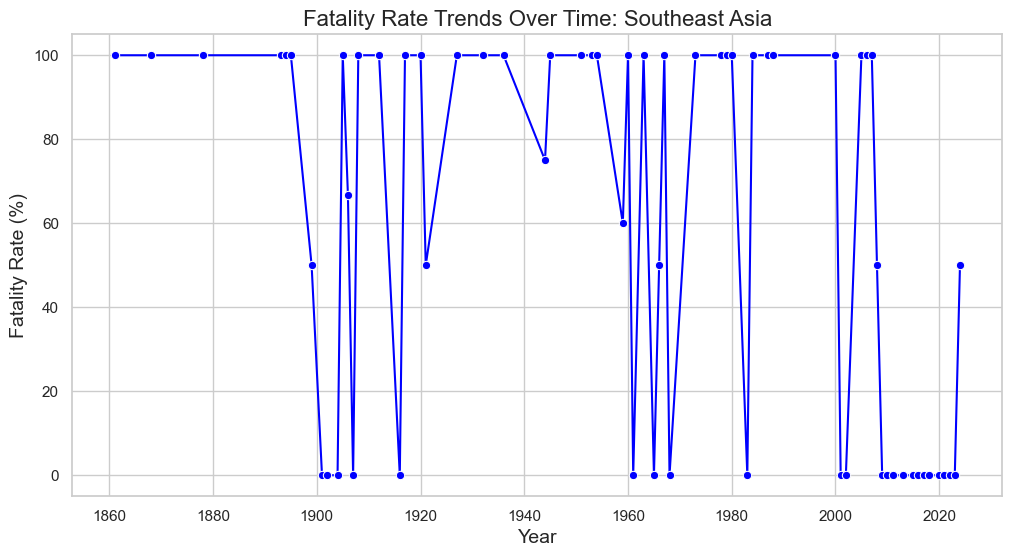

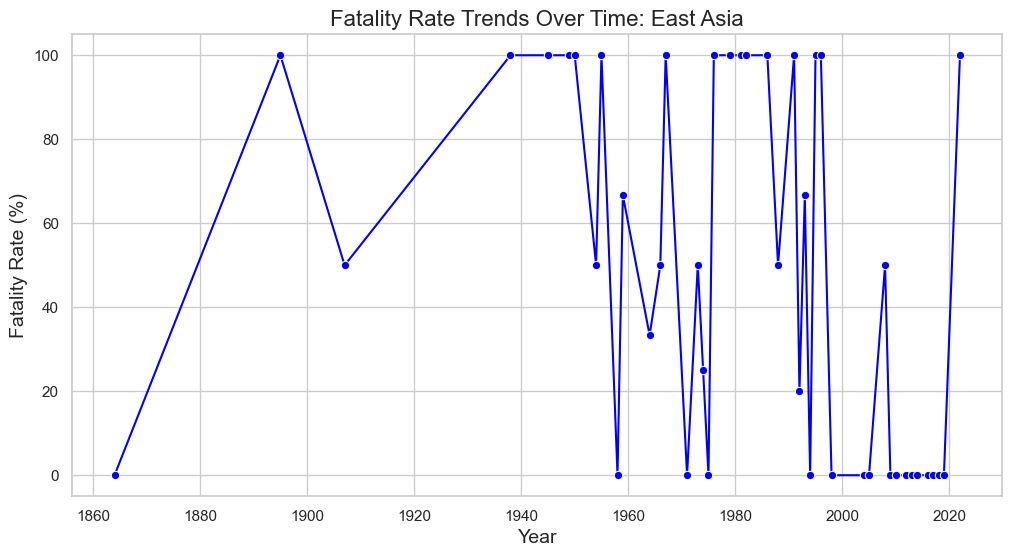

In [45]:
# List of regions to analyze
regions = ['australia and oceania', 'southeast asia', 'east asia']

# Loop through each region and create a plot
for region in regions:
    # Filter data for the region
    region_data = df_filtered[df_filtered['Region'] == region]
    
    # Group by Year and calculate fatality rate
    grouped = region_data.groupby('Year')['Fatal Y/N'].agg(
        total_attacks='count',
        total_fatalities=lambda x: (x == 'Y').sum()
    ).reset_index()
    
    grouped['fatality_rate'] = (grouped['total_fatalities'] / grouped['total_attacks']) * 100
    
    # Plot fatality rate trends over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped, x='Year', y='fatality_rate', marker='o', color='blue')
    
    # Add labels and title
    plt.title(f'Fatality Rate Trends Over Time: {region.title()}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Fatality Rate (%)', fontsize=14)
    plt.grid(True)
    plt.show()

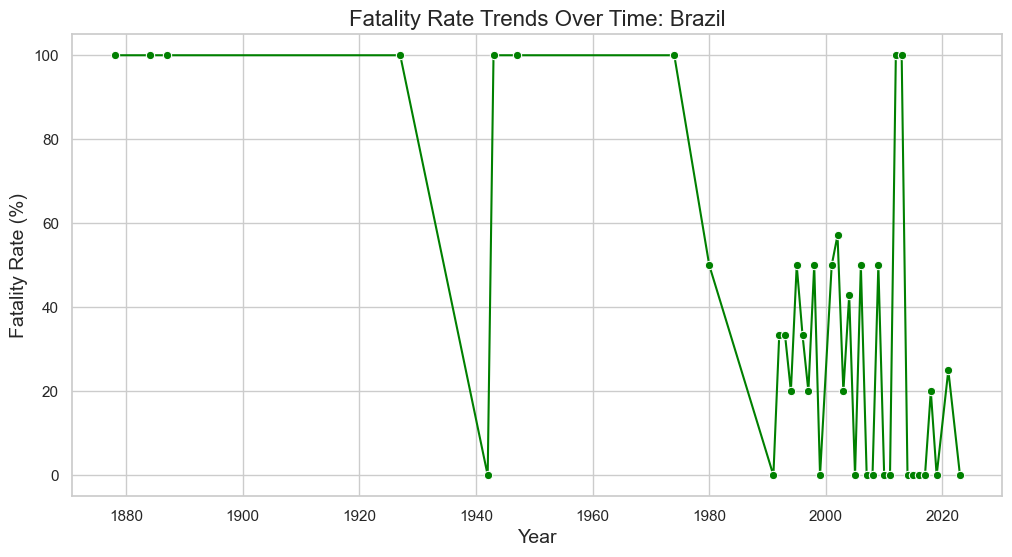

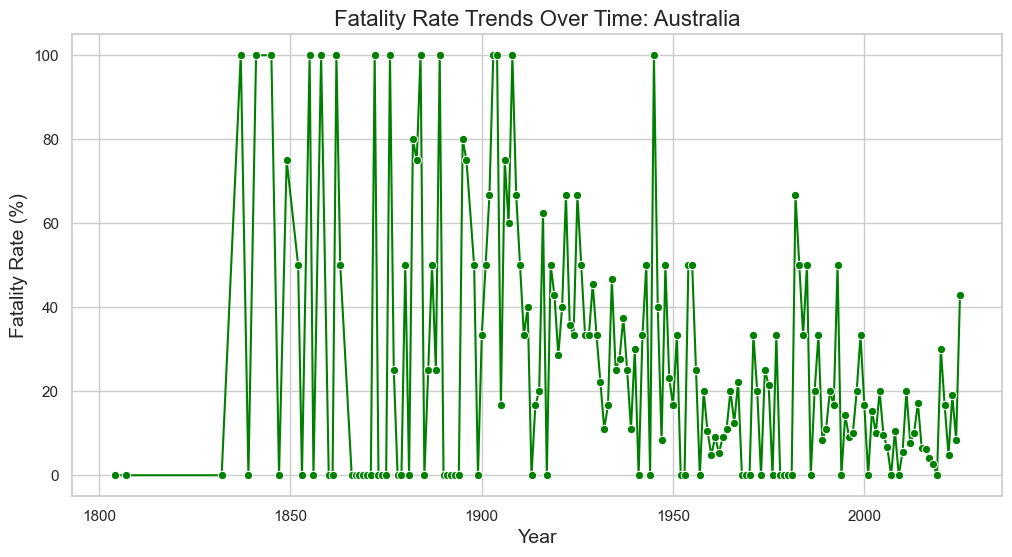

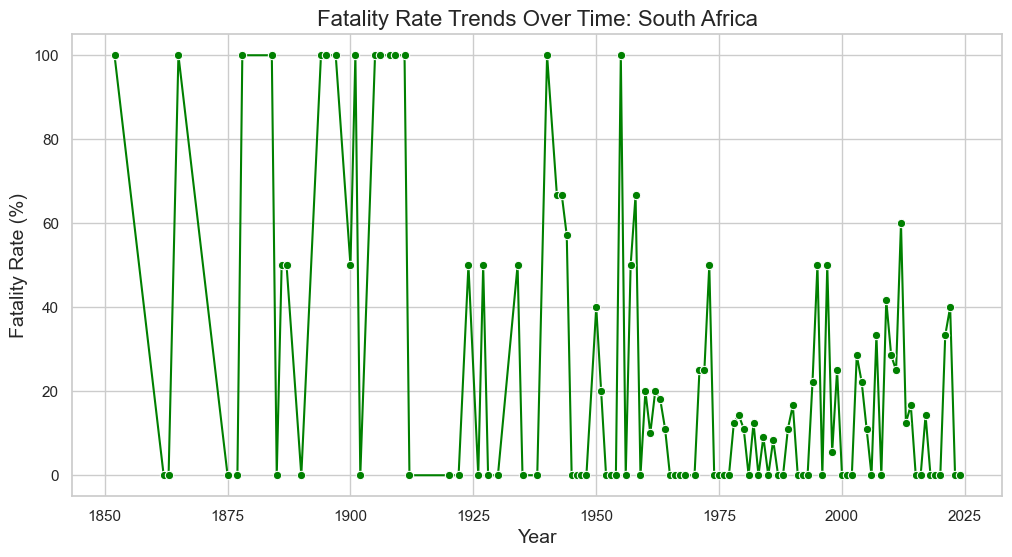

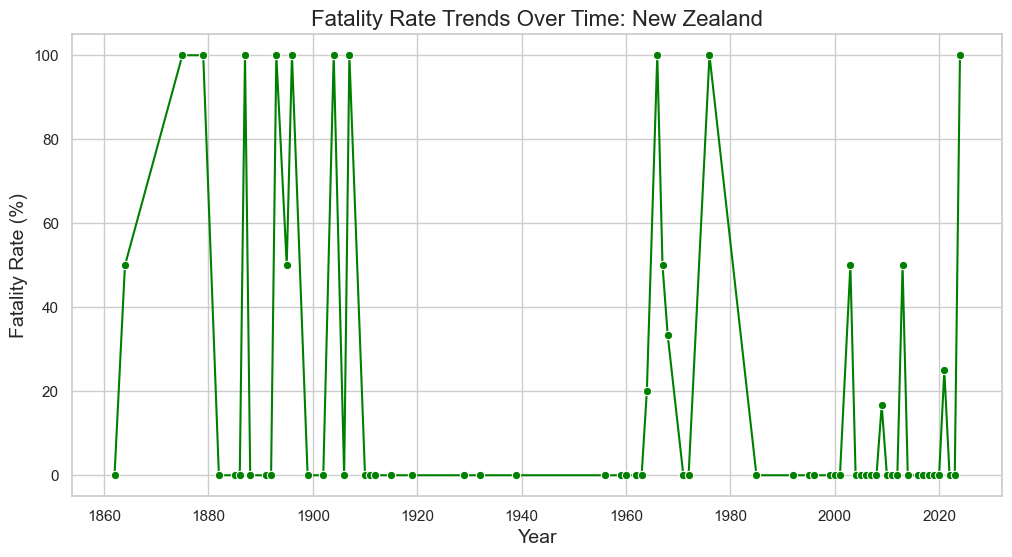

In [46]:
# List of countries to analyze
countries = ['brazil', 'australia', 'south africa', 'new zealand']

# Loop through each country and create a plot
for country in countries:
    # Filter data for the country
    country_data = df_filtered[df_filtered['Country'] == country]
    
    # Group by Year and calculate fatality rate
    grouped = country_data.groupby('Year')['Fatal Y/N'].agg(
        total_attacks='count',
        total_fatalities=lambda x: (x == 'Y').sum()
    ).reset_index()
    
    grouped['fatality_rate'] = (grouped['total_fatalities'] / grouped['total_attacks']) * 100
    
    # Plot fatality rate trends over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped, x='Year', y='fatality_rate', marker='o', color='green')
    
    # Add labels and title
    plt.title(f'Fatality Rate Trends Over Time: {country.title()}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Fatality Rate (%)', fontsize=14)
    plt.grid(True)
    plt.show()

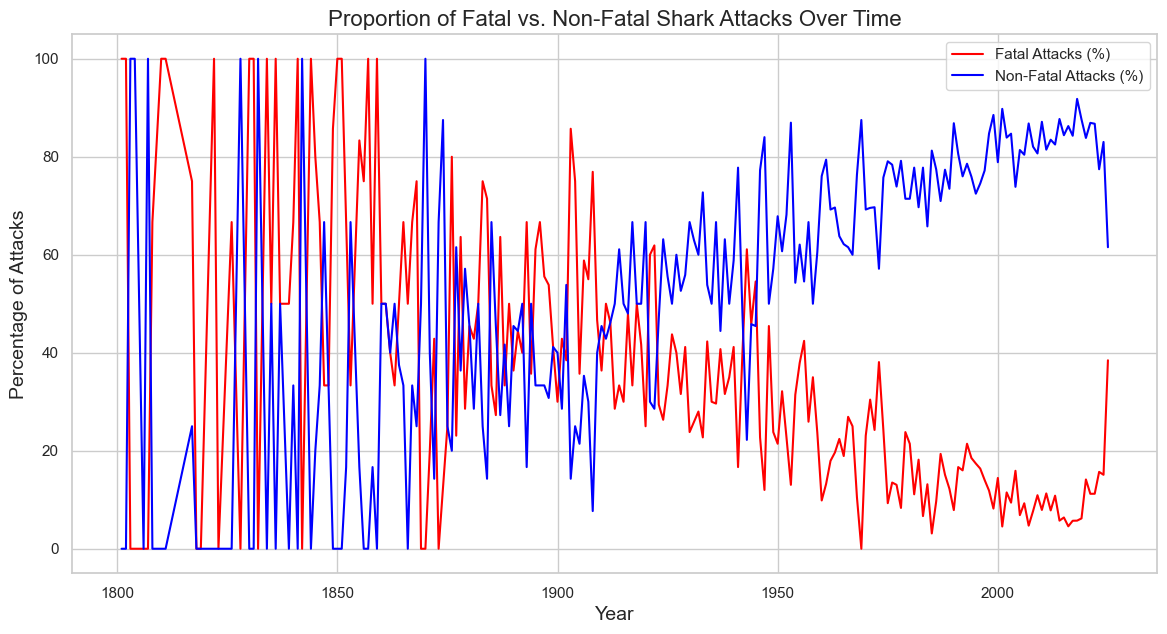

In [48]:
# Group by Year and calculate the proportion of fatal vs. non-fatal attacks
yearly_stats = df_filtered.groupby('Year')['Fatal Y/N'].agg(
    total_attacks='count',
    total_fatalities=lambda x: (x == 'Y').sum(),
    total_non_fatalities=lambda x: (x == 'N').sum()
).reset_index()

# Calculate percentages
yearly_stats['fatal_percentage'] = (yearly_stats['total_fatalities'] / yearly_stats['total_attacks']) * 100
yearly_stats['non_fatal_percentage'] = (yearly_stats['total_non_fatalities'] / yearly_stats['total_attacks']) * 100

# Plot the proportions over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_stats, x='Year', y='fatal_percentage', color='red', label='Fatal Attacks (%)')
sns.lineplot(data=yearly_stats, x='Year', y='non_fatal_percentage', color='blue', label='Non-Fatal Attacks (%)')

# Add labels and title
plt.title('Proportion of Fatal vs. Non-Fatal Shark Attacks Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Attacks', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

End Guillermo's Code

------

In [66]:
df_no_unknown = df[(df["Fatal Y/N"] != "U") & (df["Activity"] != "unqualified")]

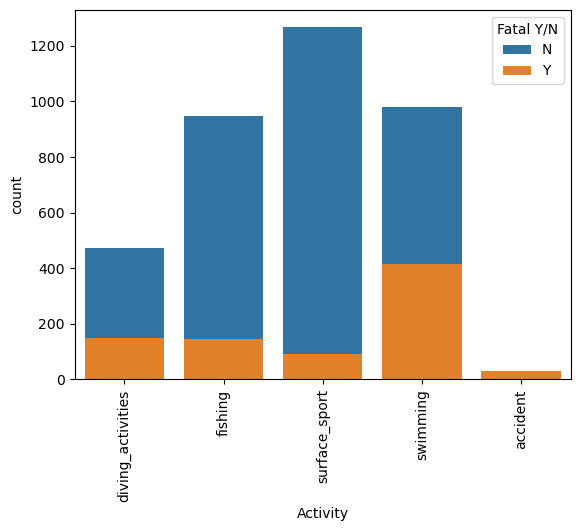

In [67]:
sns.countplot(df_no_unknown, x="Activity", hue="Fatal Y/N", dodge=False)
plt.xticks(rotation=90)
plt.show()

In [68]:
df_crosstab = pd.crosstab(df_no_unknown["Fatal Y/N"], df_no_unknown.Activity)

In [69]:
df_crosstab

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,9,473,947,1266,981
Y,29,149,147,90,415


In [70]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df_crosstab)

chi2_statistic, chi2_p_value

(359.5905758335372, 1.4896549798408316e-76)

In [71]:
association(df_crosstab, method="cramer")

0.2824935634088099

In [72]:
df_crosstab_normalized = df_crosstab.apply(lambda x: x / x.sum(), axis=0)
round(df_crosstab_normalized * 100, 2)

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,23.68,76.05,86.56,93.36,70.27
Y,76.32,23.95,13.44,6.64,29.73


In [73]:
df_crosstab_normalized = round(df_crosstab_normalized.transpose()*100,2)

In [74]:
df_crosstab_normalized.sort_values(by="N")

Fatal Y/N,N,Y
Activity,,
accident,23.68,76.32
swimming,70.27,29.73
diving_activities,76.05,23.95
fishing,86.56,13.44
surface_sport,93.36,6.64


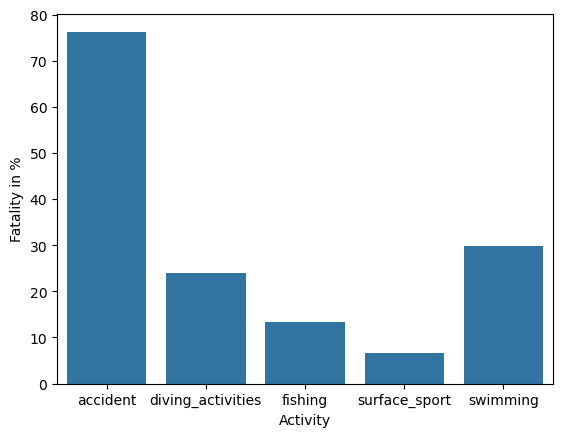

In [84]:
sns.barplot(df_crosstab_normalized, x="Activity",y="Y")
plt.ylabel("Fatality in %")
#plt.xticks(rotation=90)
plt.show()

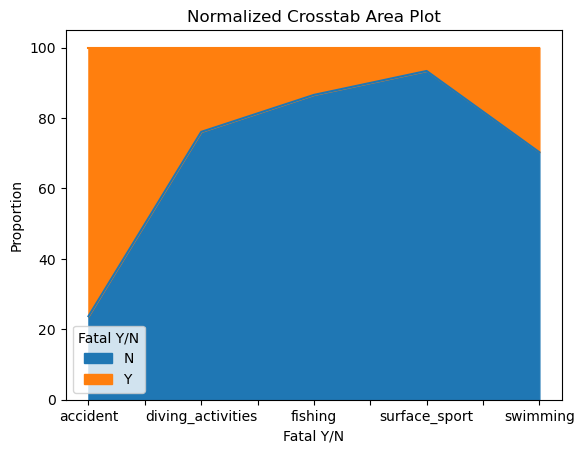

In [75]:
df_crosstab_normalized.plot(kind='area', stacked=True)
plt.title('Normalized Crosstab Area Plot')
plt.xlabel('Fatal Y/N')
plt.ylabel('Proportion')
plt.show()